In [ ]:
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

#Train test split
from sklearn.model_selection import train_test_split

In [ ]:
pcos_data=pd.read_excel('/content/drive/MyDrive/PCOS_data.xlsx')

In [ ]:
pcos_data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
pcos_data.shape

(541, 45)

In [ ]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

About the data:

This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters.

This data is collected from 10 different hospitals across Kerala, India.

The unit used is feet to cm

Blood pressure entered as systolic and diastolic separately

RBS means Random glucose test

Beta-HCG cases are mentioned as Case I and II

Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18


**DATA PREPROCESSING**

In [ ]:
# 1.Drop redundant columns
drop_columns = ['Sl. No', 'Patient File No.', 'Height(Cm)', 'Weight (Kg)', 'Unnamed: 44']
pcos_data.drop(columns=drop_columns, inplace=True)

In [ ]:
pcos_data.head()

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,19.3,15,78,22,10.48,2,5,7.0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.9,15,74,20,11.70,2,5,11.0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.3,11,72,18,11.80,2,5,10.0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.7,13,72,20,12.00,2,5,4.0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.1,11,72,18,10.00,2,5,1.0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1   Age (yrs)               541 non-null    int64  
 2   BMI                     541 non-null    float64
 3   Blood Group             541 non-null    int64  
 4   Pulse rate(bpm)         541 non-null    int64  
 5   RR (breaths/min)        541 non-null    int64  
 6   Hb(g/dl)                541 non-null    float64
 7   Cycle(R/I)              541 non-null    int64  
 8   Cycle length(days)      541 non-null    int64  
 9   Marraige Status (Yrs)   540 non-null    float64
 10  Pregnant(Y/N)           541 non-null    int64  
 11  No. of abortions        541 non-null    int64  
 12  I   beta-HCG(mIU/mL)    541 non-null    float64
 13  II    beta-HCG(mIU/mL)  541 non-null    float64
 14  FSH(mIU/mL)             541 non-null    fl

In [ ]:
#2.Handling null values
pcos_data.isnull().sum()

,0
PCOS (Y/N),0
Age (yrs),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0
Cycle length(days),0
Marraige Status (Yrs),1


In [ ]:
# Replace NaN in 'Marraige Status (Yrs)' with median
pcos_data['Marraige Status (Yrs)'] = pcos_data['Marraige Status (Yrs)'].fillna(pcos_data['Marraige Status (Yrs)'].median())
# Replace NaN in 'Fast food (Y/N)' with mode
pcos_data['Fast food (Y/N)'] = pcos_data['Fast food (Y/N)'].fillna(pcos_data['Fast food (Y/N)'].mode()[0]) # Access the mode value using [0]

In [ ]:
pcos_data.isnull().sum()

,0
PCOS (Y/N),0
Age (yrs),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0
Cycle length(days),0
Marraige Status (Yrs),0


<ipython-input-14-3d9007061f5c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
<ipython-input-14-3d9007061f5c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
<ipython-input-14-3d9007061f5c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
<ipython-input-14-3d9007061f5c>:12: FutureWarning: 

Passing `palette` wi

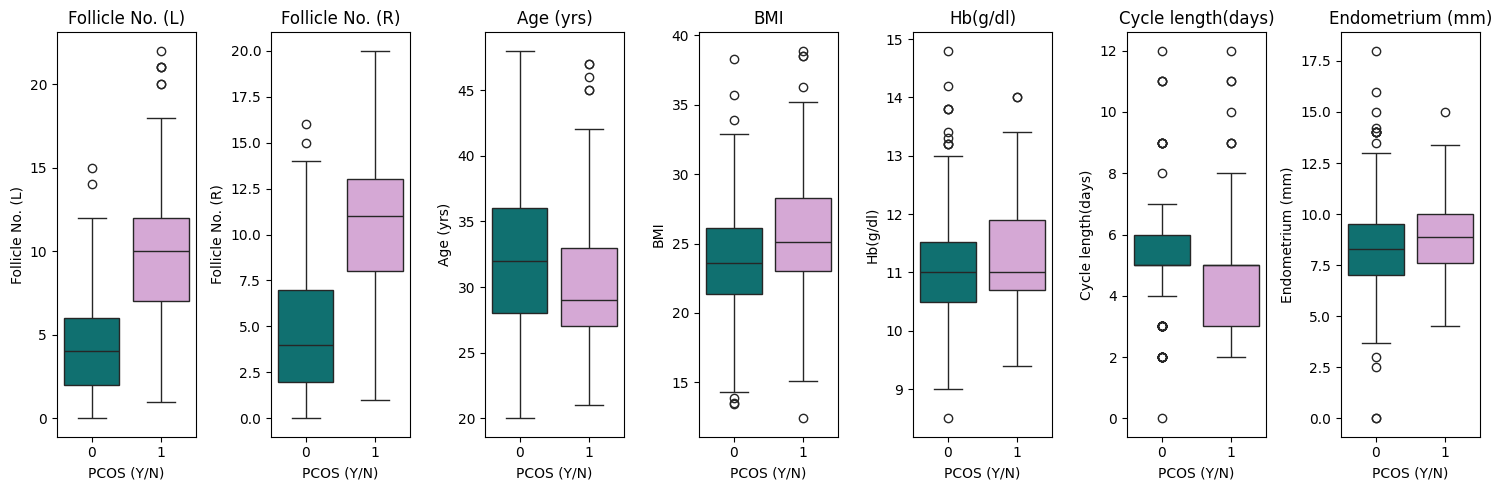

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ["Follicle No. (L)","Follicle No. (R)","Age (yrs)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
color = ["teal", "plum"]

# Create a figure and an array of subplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))  # 1 row, 5 columns

# Iterate through features and create box plots on subplots
for i, feature in enumerate(features):
    sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
    axes[i].set_title(feature)  # Set title for each subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
#3. Function to remove outliers
# Function to cap outliers at the lower and upper bound
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with nearest valid values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

In [ ]:
features = ["Follicle No. (L)", "Follicle No. (R)", "Age (yrs)", "BMI", "Hb(g/dl)", "Cycle length(days)", "Endometrium (mm)",'PRG(ng/mL)','Pulse rate(bpm)','RR (breaths/min)','No. of abortions','FSH(mIU/mL)','LH(mIU/mL)','FSH/LH','Hip(inch)','Waist(inch)','TSH (mIU/L)','AMH(ng/mL)','PRL(ng/mL)','Vit D3 (ng/mL)','RBS(mg/dl)','Avg. F size (L) (mm)','Avg. F size (R) (mm)','I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)']


for col in features:
    pcos_data = cap_outliers(pcos_data, col)

In [ ]:
pcos_data.head()

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28.0,19.3,15,77.0,22.0,10.48,2,5.0,7.0,...,0,1.0,0,110,80,3.0,3.0,18.0,18.0,8.5
1,0,36.0,24.9,15,74.0,20.0,11.70,2,5.0,11.0,...,0,0.0,0,120,70,3.0,5.0,15.0,14.0,3.7
2,1,33.0,25.3,11,72.0,18.0,11.80,2,5.0,10.0,...,1,1.0,0,120,80,13.0,15.0,18.0,20.0,10.0
3,0,37.0,29.7,13,72.0,20.0,12.00,2,5.0,4.0,...,0,0.0,0,120,70,2.0,2.0,15.0,14.0,7.5
4,0,25.0,20.1,11,72.0,18.0,10.00,2,5.0,1.0,...,0,0.0,0,120,80,3.0,4.0,16.0,14.0,7.0


<ipython-input-18-25ff34581c60>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
<ipython-input-18-25ff34581c60>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
<ipython-input-18-25ff34581c60>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
<ipython-input-18-25ff34581c60>:9: FutureWarning: 

Passing `palette` withou

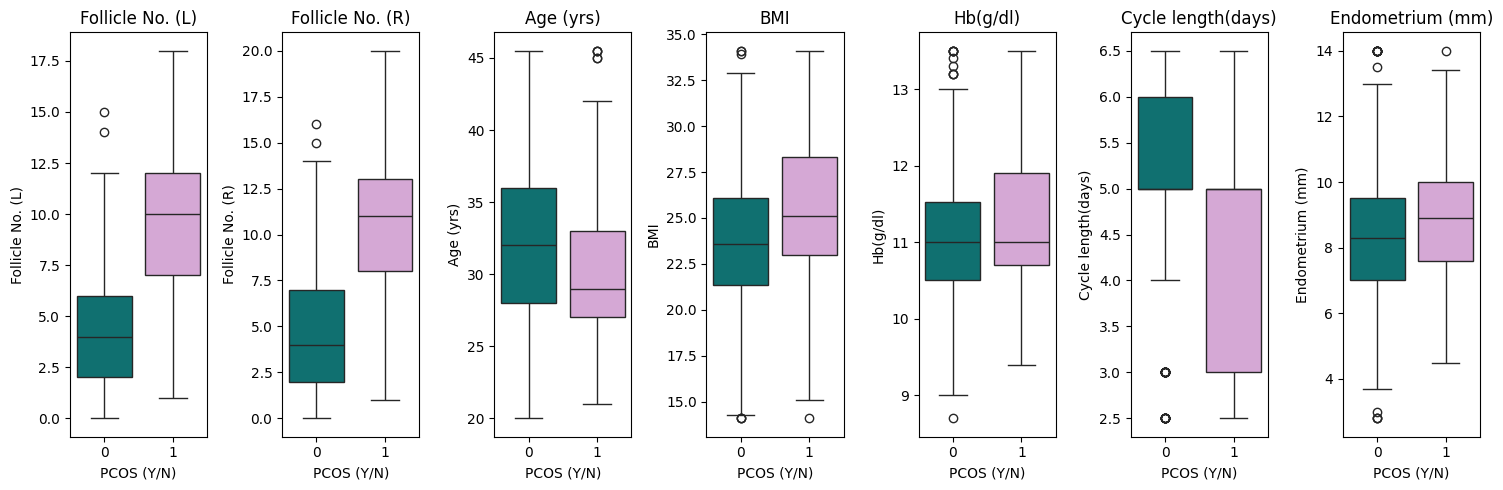

In [ ]:
features = ["Follicle No. (L)","Follicle No. (R)","Age (yrs)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
color = ["teal", "plum"]

# Create a figure and an array of subplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))  # 1 row, 5 columns

# Iterate through features and create box plots on subplots
for i, feature in enumerate(features):
    sns.boxplot(x=pcos_data["PCOS (Y/N)"], y=pcos_data[feature], palette=color, ax=axes[i])
    axes[i].set_title(feature)  # Set title for each subplot

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
def calculate_outlier_percentage(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    return outlier_percentage

# An empty list to store the results
results = []


for col in pcos_data.select_dtypes(include=['float64', 'int64']).columns:
    percentage = calculate_outlier_percentage(pcos_data, col)
    results.append([col, percentage])

outlier_df = pd.DataFrame(results, columns=['Column', 'Outlier Percentage'])


outlier_df


,Column,Outlier Percentage
0,PCOS (Y/N),0.000000
1,Age (yrs),0.000000
2,BMI,0.000000
3,Blood Group,0.000000
4,Pulse rate(bpm),0.000000
5,RR (breaths/min),0.000000
6,Hb(g/dl),0.000000
7,Cycle(R/I),0.000000
8,Cycle length(days),0.000000
9,Marraige Status (Yrs),2.033272


In [ ]:
pd.isnull(pcos_data).sum()

,0
PCOS (Y/N),0
Age (yrs),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0
Hb(g/dl),0
Cycle(R/I),0
Cycle length(days),0
Marraige Status (Yrs),0


In [ ]:
pcos_data.describe()

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.416821,24.271165,13.802218,73.146026,19.199630,11.153198,2.560074,4.847505,7.679667,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.097967,6.641405,15.096673,15.475970,8.471664
std,0.469615,5.372470,3.914226,1.840812,2.079647,1.544668,0.842803,0.901950,1.065163,4.799475,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.128449,4.436889,3.286739,3.227706,2.080154
min,0.000000,20.000000,14.100000,11.000000,69.000000,16.000000,8.700000,2.000000,2.500000,0.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,5.500000,5.500000,2.800000
25%,0.000000,28.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,5.000000,7.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,5.000000,10.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,45.500000,34.100000,18.000000,77.000000,23.000000,13.500000,5.000000,6.500000,30.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,18.000000,20.000000,24.000000,24.000000,14.000000


**EXPLORATORY DATA ANALYSIS**

*Steps involved in EDA*

Feature selection based on the correlation factor

Patterns Of Length Of The Menstrual Cycle

Patterns Of BMI

Patterns Of Irregularity In Mensuration

Number of Follicles

Some Miscellaneous EDA


<ipython-input-22-b9ab239c38fa>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, target_col]).size().unstack(fill_value=0)
<ipython-input-22-b9ab239c38fa>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, target_col]).size().unstack(fill_value=0)
<ipython-input-22-b9ab239c38fa>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, target_col]).siz

Categorical Features Percentage Data:
PCOS (Y/N)  index  Index  With PCOS (%)  Without PCOS Count  With PCOS Count  \
0             0.0  66.27          33.73                 222              113   
1             1.0  68.93          31.07                 142               64   
2             0.0  83.38          16.62                 281               56   
3             1.0  40.69          59.31                  83              121   
4             0.0  80.66          19.34                 317               76   

PCOS (Y/N)        Category         Attribute  
0             Not Pregnant     Pregnant(Y/N)  
1                 Pregnant     Pregnant(Y/N)  
2           No Weight Gain  Weight gain(Y/N)  
3              Weight Gain  Weight gain(Y/N)  
4           No Hair Growth  hair growth(Y/N)  

Numerical Features (Binned) Percentage Data:
PCOS (Y/N)        index  Index  With PCOS (%)  Without PCOS Count  \
0           20.0 - 25.1  48.53          51.47                  33   
1           25.

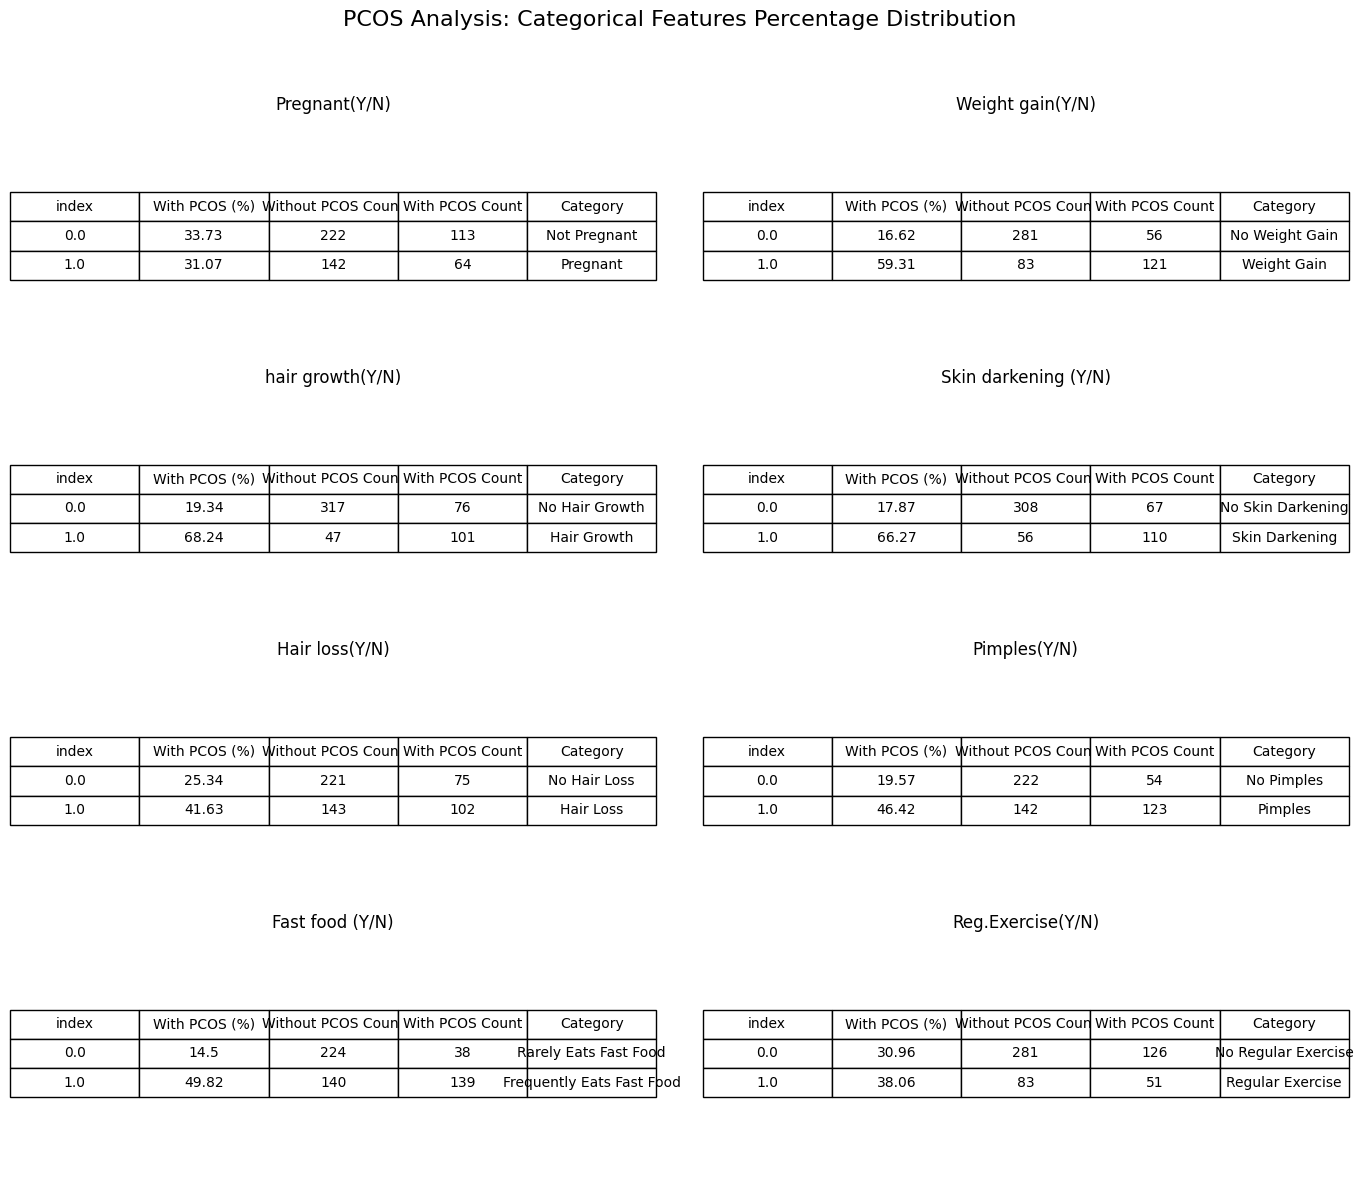

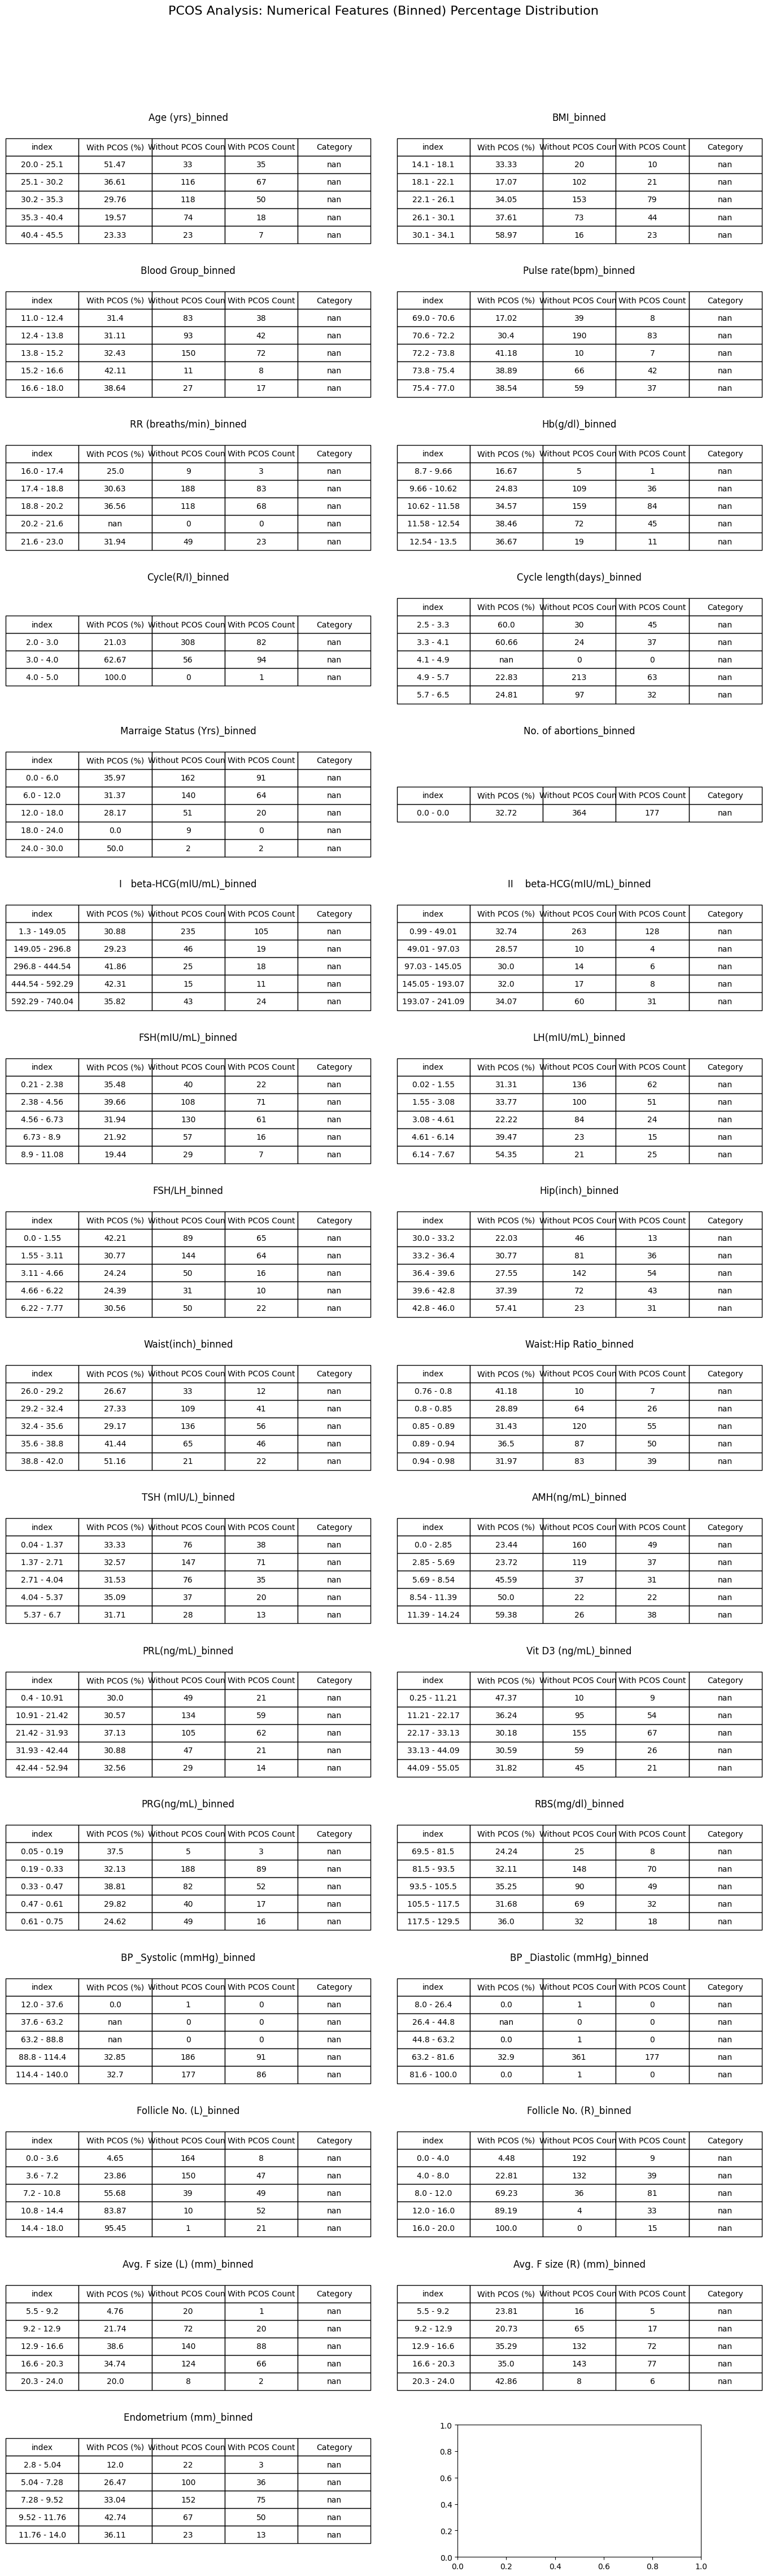

In [ ]:
# Identify categorical and numerical columns
categorical_cols = [col for col in pcos_data.columns if pcos_data[col].nunique() == 2 and col != 'PCOS (Y/N)']
numerical_cols = [col for col in pcos_data.select_dtypes(include=['int64', 'float64']).columns if col not in categorical_cols + ['PCOS (Y/N)']]

# Define category mappings
category_mappings = {
    'Pregnant(Y/N)': {0: 'Not Pregnant', 1: 'Pregnant'},
    'Weight gain(Y/N)': {0: 'No Weight Gain', 1: 'Weight Gain'},
    'hair growth(Y/N)': {0: 'No Hair Growth', 1: 'Hair Growth'},
    'Skin darkening (Y/N)': {0: 'No Skin Darkening', 1: 'Skin Darkening'},
    'Hair loss(Y/N)': {0: 'No Hair Loss', 1: 'Hair Loss'},
    'Pimples(Y/N)': {0: 'No Pimples', 1: 'Pimples'},
    'Fast food (Y/N)': {0: 'Rarely Eats Fast Food', 1: 'Frequently Eats Fast Food'},
    'Reg.Exercise(Y/N)': {0: 'No Regular Exercise', 1: 'Regular Exercise'}
}

def bin_numerical_data(df, col, bins=5):
    # Check if the column has unique values for creating bins
    if df[col].nunique() < bins:
        bins = df[col].nunique()  # Adjust bins if needed
    bin_edges = np.linspace(df[col].min(), df[col].max(), bins + 1)
    labels = [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(bins)]
    df[col + '_binned'] = pd.cut(df[col], bins=bin_edges, labels=labels, include_lowest=True, duplicates='drop') # Add duplicates='drop'
    return df

# Apply binning to numerical columns
binned_data = pcos_data.copy()
for col in numerical_cols:
    binned_data = bin_numerical_data(binned_data, col)

# Function to calculate percentage distribution
def calculate_percentage_extended(df, features, target_col):
    percentage_table = pd.DataFrame()
    for col in features:
        counts = df.groupby([col, target_col]).size().unstack(fill_value=0)
        percentages = counts.div(counts.sum(axis=1), axis=0) * 100
        percentages = percentages.rename(columns={0: 'Without PCOS (%)', 1: 'With PCOS (%)'})
        percentages['Without PCOS Count'] = counts[0]
        percentages['With PCOS Count'] = counts[1]
        percentages['Category'] = percentages.index.map(category_mappings.get(col, {0: 'No', 1: 'Yes'}))
        percentages['Attribute'] = col
        percentages = percentages.round(2)
        percentage_table = pd.concat([percentage_table, percentages])

    percentage_table = percentage_table.reset_index().rename(columns={percentage_table.columns[0]: 'Index'})
    return percentage_table

# Compute percentages
categorical_percentage_data = calculate_percentage_extended(binned_data, categorical_cols, 'PCOS (Y/N)')
numerical_percentage_data = calculate_percentage_extended(binned_data, [col + '_binned' for col in numerical_cols], 'PCOS (Y/N)')

# Display the results
print("Categorical Features Percentage Data:")
print(categorical_percentage_data.head())
print("\nNumerical Features (Binned) Percentage Data:")
print(numerical_percentage_data.head())

# Visualization function
def plot_percentage_data(data, title):
    attributes = data['Attribute'].unique()
    num_attributes = len(attributes)
    fig, axes = plt.subplots(nrows=(num_attributes // 2 + num_attributes % 2), ncols=2, figsize=(14, num_attributes * 1.5))
    axes = axes.flatten()

    for i, attr in enumerate(attributes):
        subset = data[data['Attribute'] == attr].drop(columns=['Attribute', 'Index'])
        axes[i].axis('tight')
        axes[i].axis('off')
        table = axes[i].table(cellText=subset.values, colLabels=subset.columns, cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.5, 1.5)
        axes[i].set_title(attr, fontsize=12)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot results
plot_percentage_data(categorical_percentage_data, "PCOS Analysis: Categorical Features Percentage Distribution")
plot_percentage_data(numerical_percentage_data, "PCOS Analysis: Numerical Features (Binned) Percentage Distribution")


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
<ipython-input-23-5285afb79505>:22: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_matrix.loc[col1, col2] = spearmanr(pcos_data[col1], pcos_data[col2])[0]  # Spearman's Rank Correlation


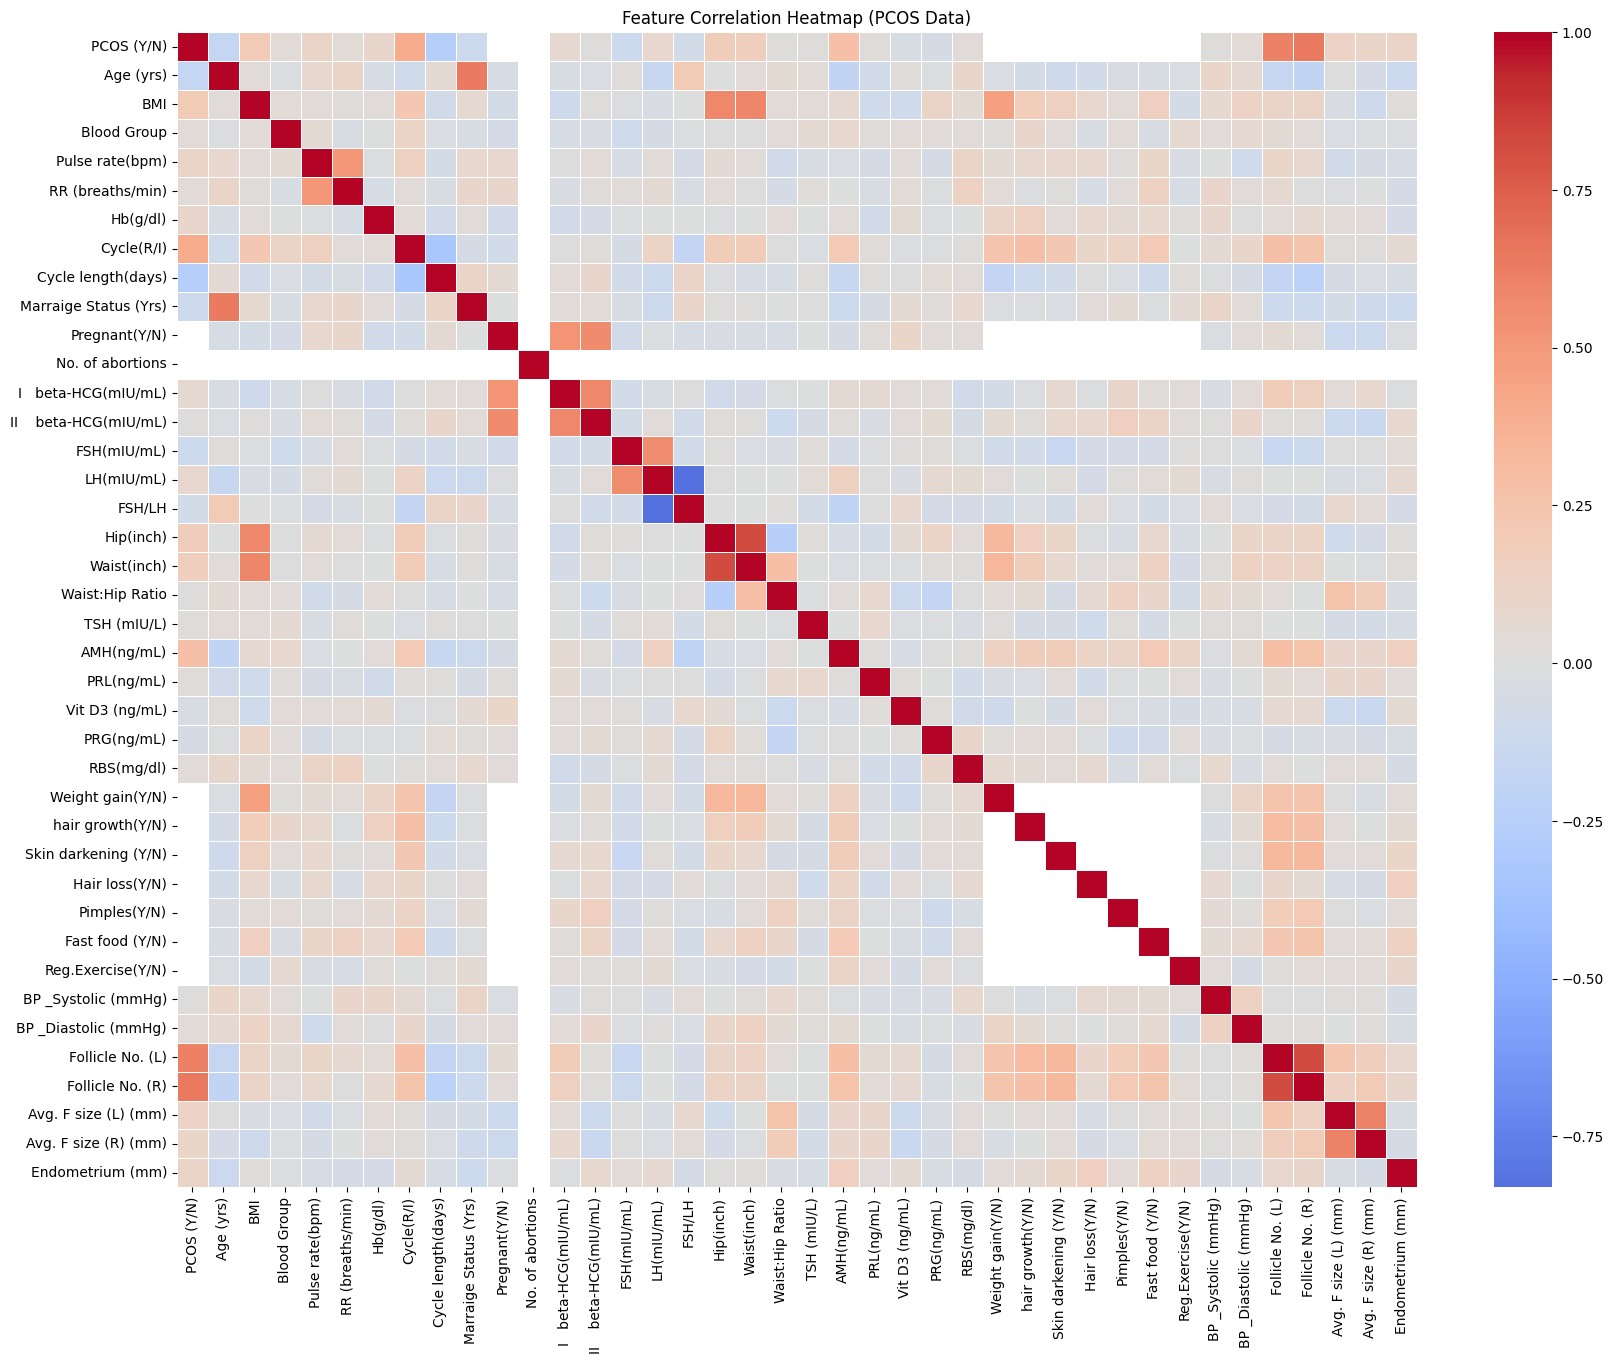

In [ ]:
#2. Correlation Heatmap (Spearman's, Point-Biserial,Cramer's)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pointbiserialr
import scipy.stats as stats

# Identify column types
binary_cols = [col for col in pcos_data.columns if pcos_data[col].nunique() == 2]  # Binary features (Y/N)
num_cols = [col for col in pcos_data.select_dtypes(include=['int64', 'float64']).columns if col not in binary_cols]  # Numerical features
cat_cols = ["Blood Group", "Cycle(R/I)"]  # Other categorical features (modify if needed)

# Initialize correlation matrix
correlation_matrix = pd.DataFrame(index=pcos_data.columns, columns=pcos_data.columns, dtype=float)

# Compute correlations
for col1 in pcos_data.columns:
    for col2 in pcos_data.columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0  # Perfect correlation with itself
        elif col1 in num_cols and col2 in num_cols:
            correlation_matrix.loc[col1, col2] = spearmanr(pcos_data[col1], pcos_data[col2])[0]  # Spearman's Rank Correlation
        elif col1 in binary_cols and col2 in num_cols:
            correlation_matrix.loc[col1, col2] = pointbiserialr(pcos_data[col1], pcos_data[col2])[0]  # Point-Biserial Correlation
        elif col1 in num_cols and col2 in binary_cols:
            correlation_matrix.loc[col1, col2] = pointbiserialr(pcos_data[col2], pcos_data[col1])[0]  # Reverse case
        elif col1 in cat_cols and col2 in cat_cols:
            contingency_table = pd.crosstab(pcos_data[col1], pcos_data[col2])
            chi2 = stats.chi2_contingency(contingency_table)[0]
            n = pcos_data.shape[0]
            phi2 = chi2 / n
            r, k = contingency_table.shape
            cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))
            correlation_matrix.loc[col1, col2] = cramers_v  # Cramér’s V for categorical-categorical

# Convert to float type
correlation_matrix = correlation_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap (PCOS Data)")
plt.show()


<ipython-input-24-4ab9a28f30f7>:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = spearmanr(pcos_data[feature], pcos_data["PCOS (Y/N)"])
<ipython-input-24-4ab9a28f30f7>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correlation_df["Feature"], x=correlation_df["Correlation"], palette="coolwarm")


                   Feature  Correlation  Absolute Correlation  \
35        Follicle No. (R)     0.627988              0.627988   
34        Follicle No. (L)     0.580723              0.580723   
27    Skin darkening (Y/N)     0.475733              0.475733   
26        hair growth(Y/N)     0.464667              0.464667   
25        Weight gain(Y/N)     0.441047              0.441047   
6               Cycle(R/I)     0.401242              0.401242   
30         Fast food (Y/N)     0.376183              0.376183   
29            Pimples(Y/N)     0.286077              0.286077   
7       Cycle length(days)    -0.249335              0.249335   
20              AMH(ng/mL)     0.236772              0.236772   
1                      BMI     0.196442              0.196442   
0                Age (yrs)    -0.185249              0.185249   
17             Waist(inch)     0.174648              0.174648   
28          Hair loss(Y/N)     0.172879              0.172879   
16               Hip(inch

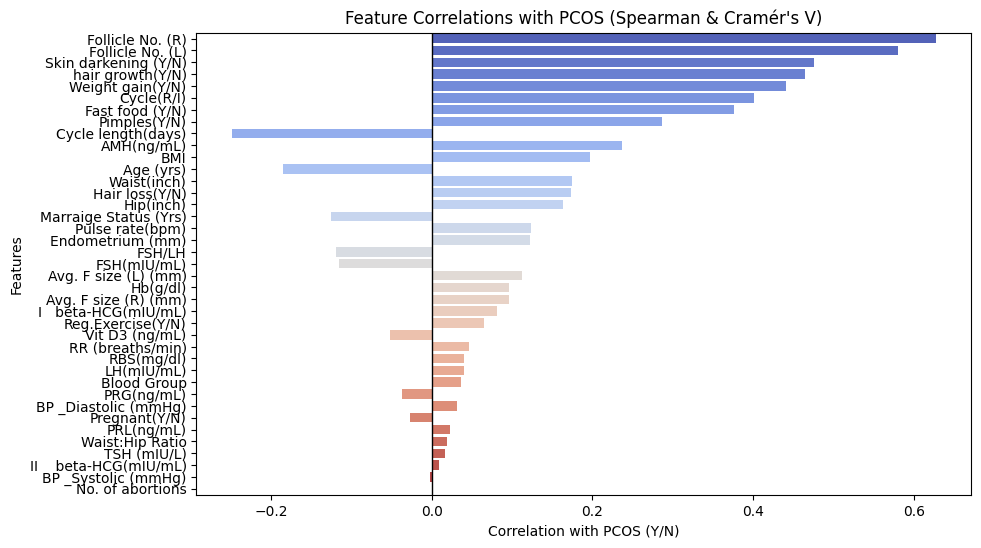

In [ ]:
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import itertools



# Identify categorical and numerical columns
categorical_features = [col for col in pcos_data.columns if pcos_data[col].nunique() <= 10 and pcos_data[col].dtype == 'object']
numerical_features = [col for col in pcos_data.columns if col not in categorical_features + ["PCOS (Y/N)"]]

# Function to compute Cramér's V for categorical data
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute correlation for all features
correlation_results = {}

for feature in pcos_data.columns:
    if feature == "PCOS (Y/N)":
        continue

    if feature in numerical_features:
        corr, _ = spearmanr(pcos_data[feature], pcos_data["PCOS (Y/N)"])
    elif feature in categorical_features:
        label_encoder = LabelEncoder()
        corr = cramers_v(label_encoder.fit_transform(pcos_data[feature]), pcos_data["PCOS (Y/N)"])
    else:
        continue

    correlation_results[feature] = corr

# Convert to DataFrame and sort by absolute correlation value
correlation_df = pd.DataFrame(correlation_results.items(), columns=['Feature', 'Correlation'])
correlation_df['Absolute Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Absolute Correlation', ascending=False)

# Function to generate inference
def generate_inference(corr_value):
    if abs(corr_value) > 0.5:
        return "Strong correlation - Significant impact on PCOS"
    elif abs(corr_value) > 0.3:
        return "Moderate correlation - Some impact on PCOS"
    else:
        return "Weak correlation - Little to no impact on PCOS"

# Apply the inference function
correlation_df["Inference"] = correlation_df["Correlation"].apply(generate_inference)

# Display results
print(correlation_df)

# Heatmap visualization
plt.figure(figsize=(10, 6))
sns.barplot(y=correlation_df["Feature"], x=correlation_df["Correlation"], palette="coolwarm")
plt.axvline(x=0, color='black', linewidth=1)  # Zero reference line
plt.xlabel("Correlation with PCOS (Y/N)")
plt.ylabel("Features")
plt.title("Feature Correlations with PCOS (Spearman & Cramér's V)")
plt.show()


In [ ]:
#3. Distribution of PCOS Cases Across Age Groups
# Define age group bins and labels
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
pcos_data['Age Group'] = pd.cut(pcos_data['Age (yrs)'],bins = age_groups,labels = age_labels)

<ipython-input-26-f400ba43c69d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = pcos_data.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()


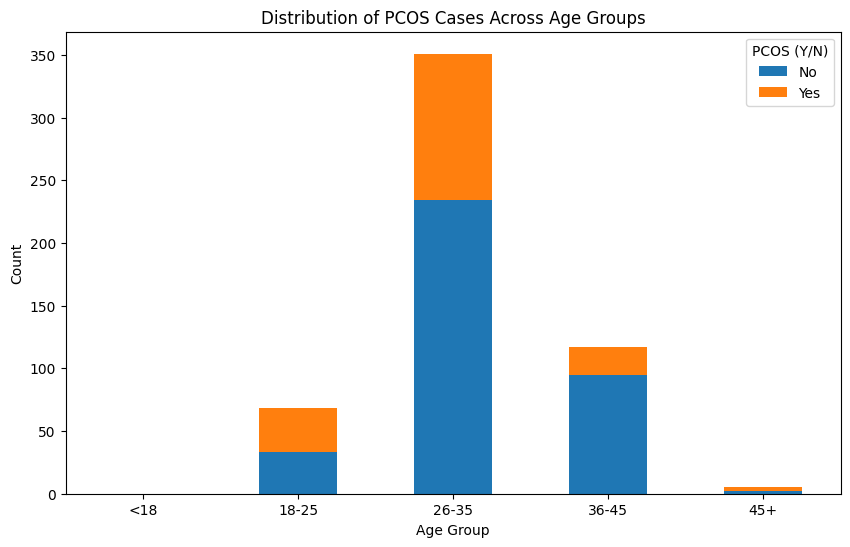

In [ ]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = pcos_data.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)


age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of PCOS Cases Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

It can be observed from above plot that PCOS affects mainly the age group of 26-35 and 18-25.

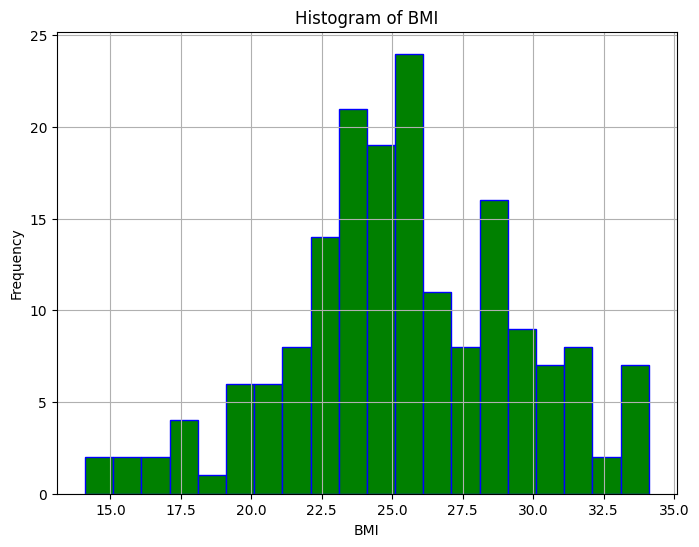

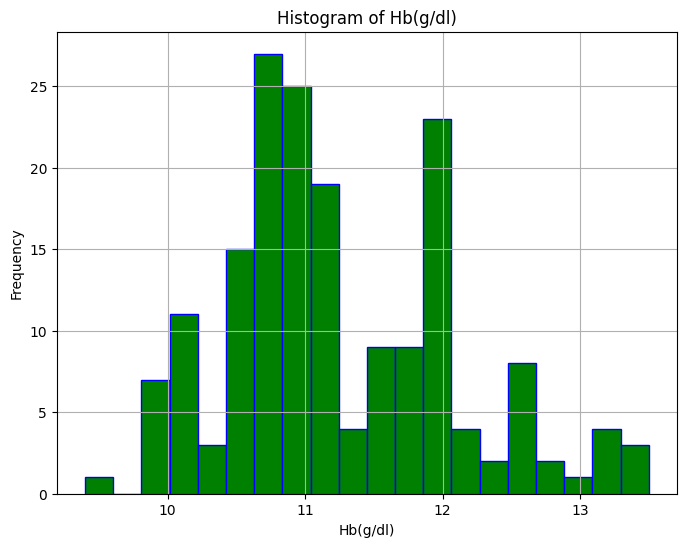

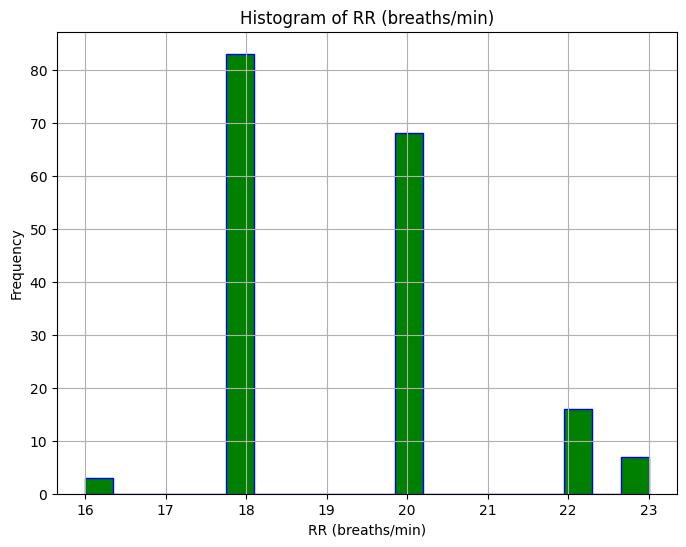

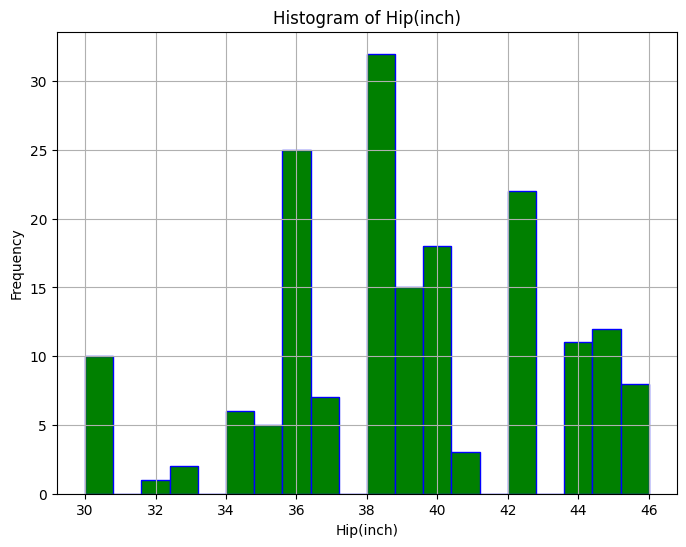

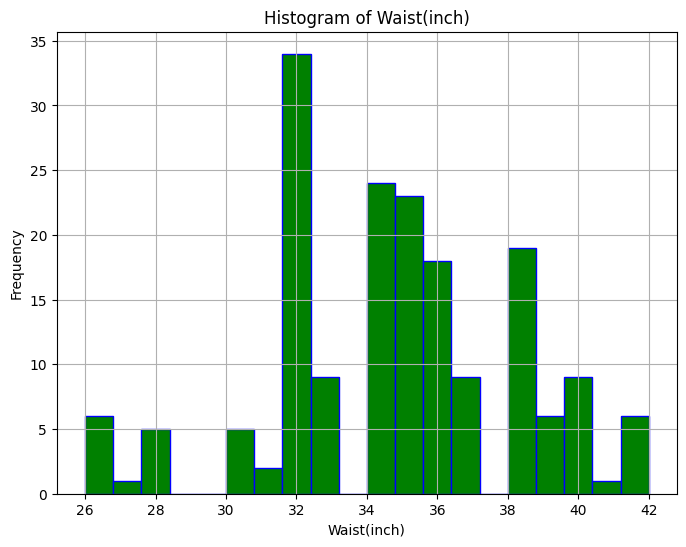

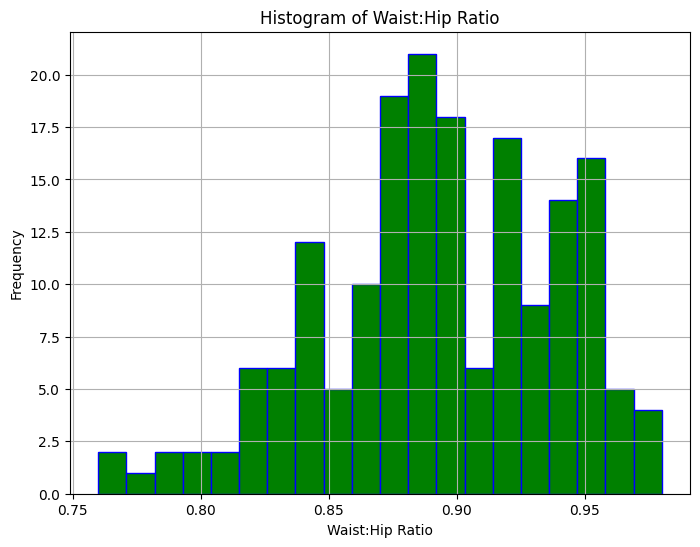

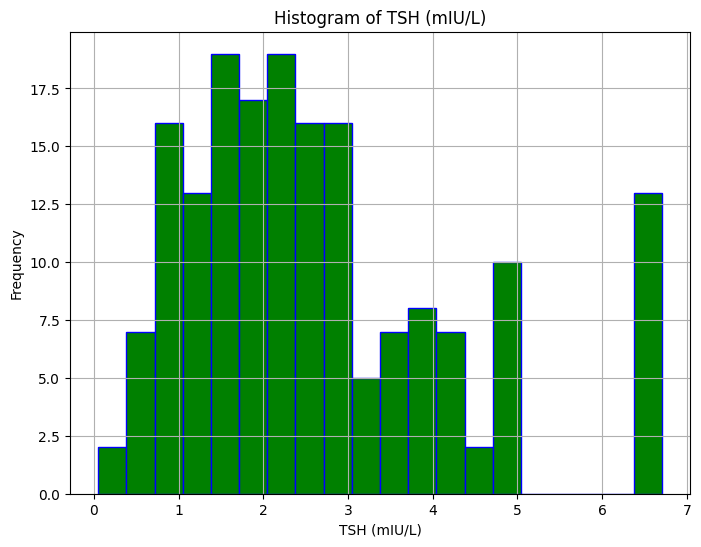

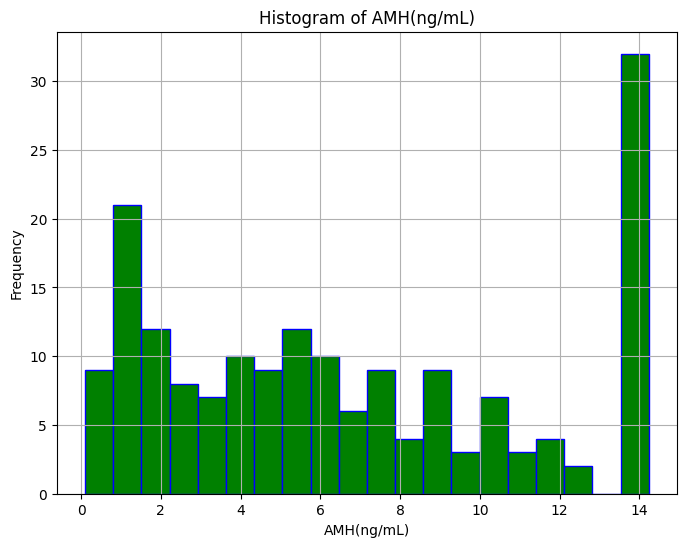

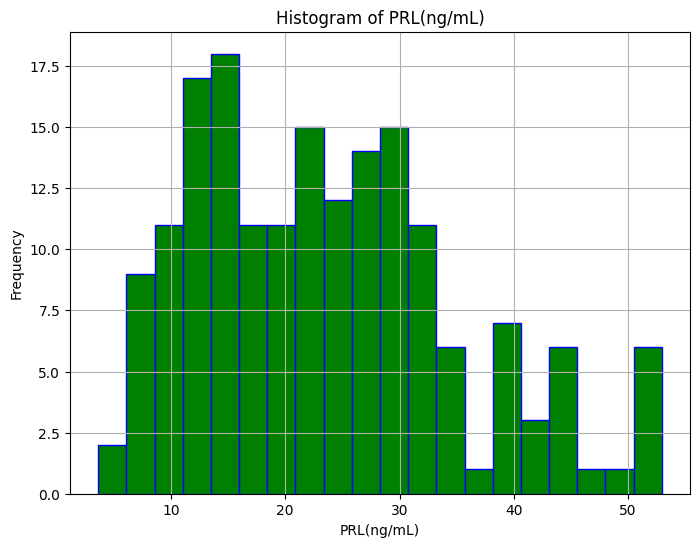

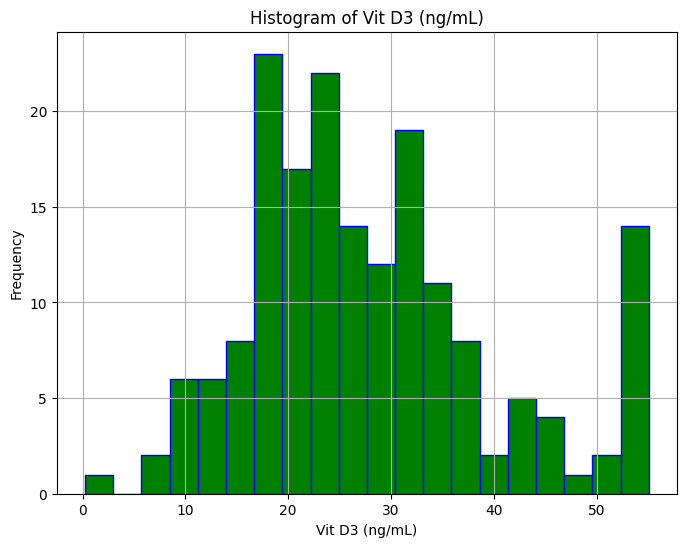

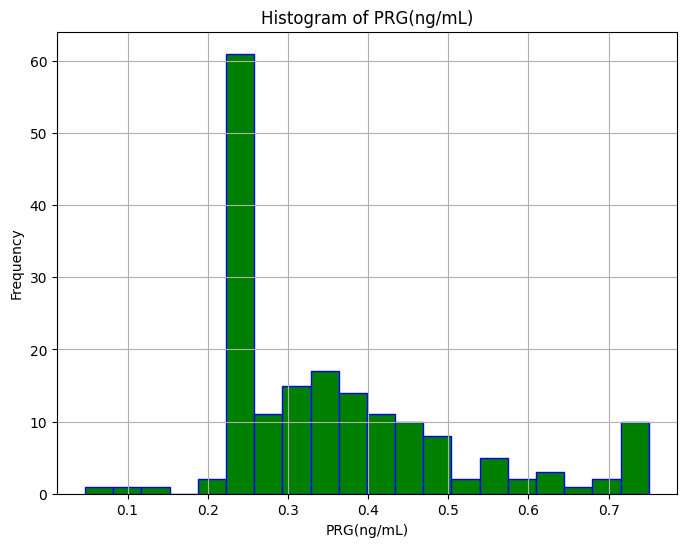

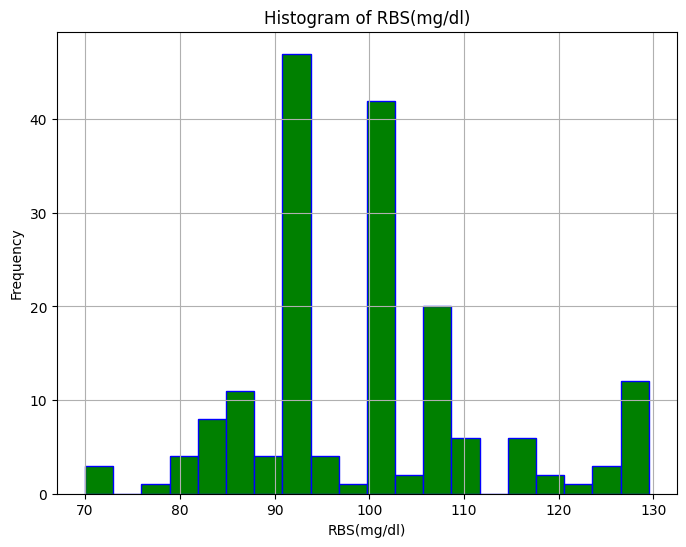

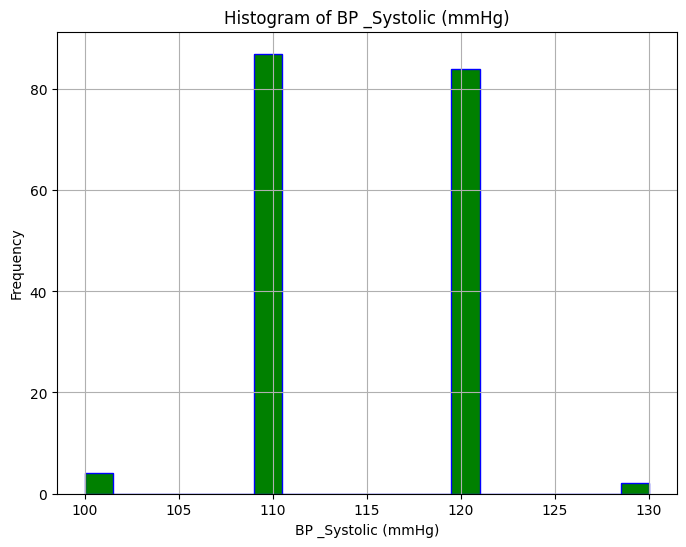

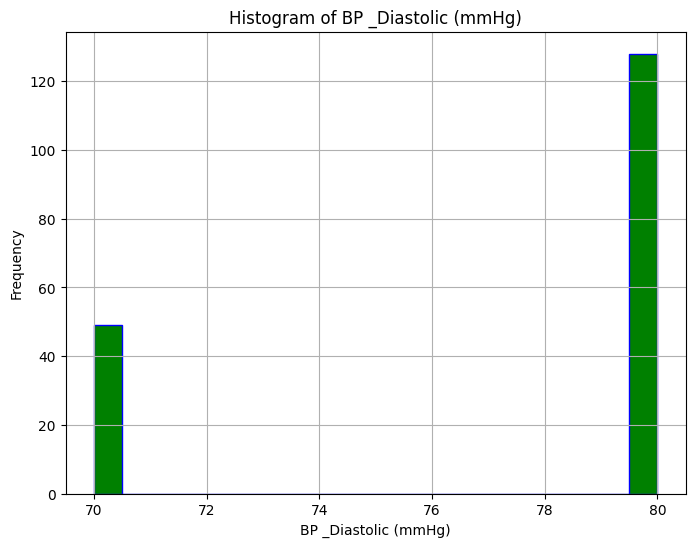

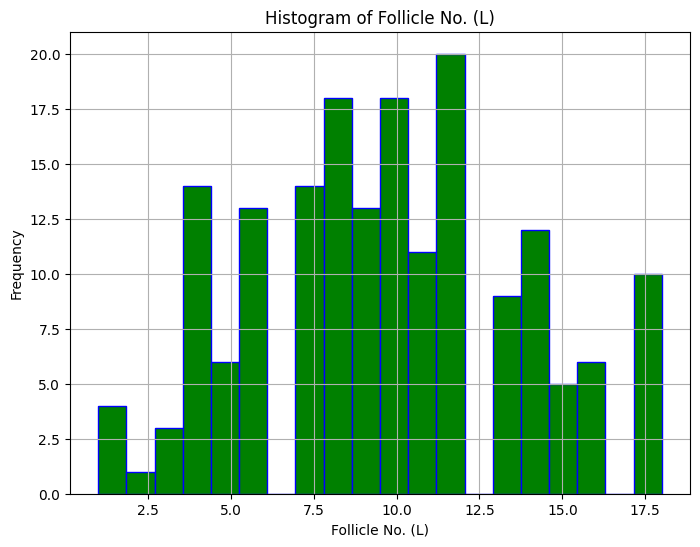

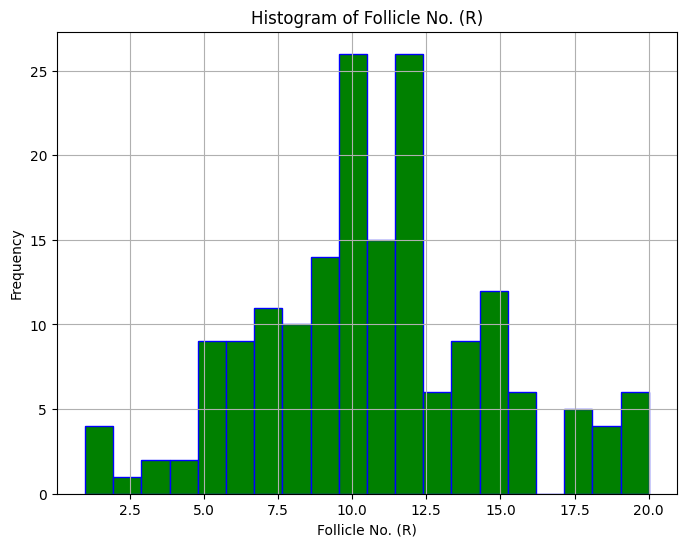

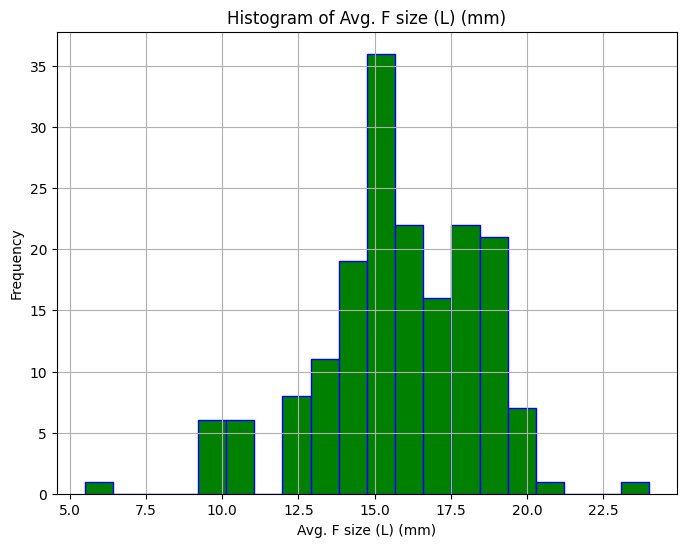

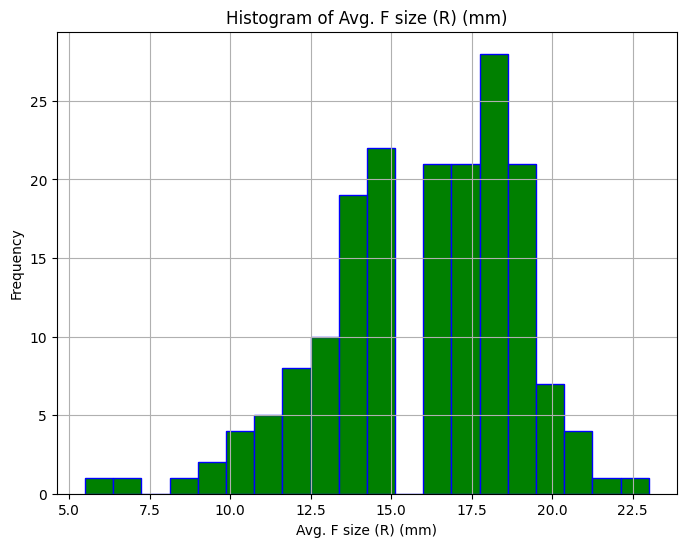

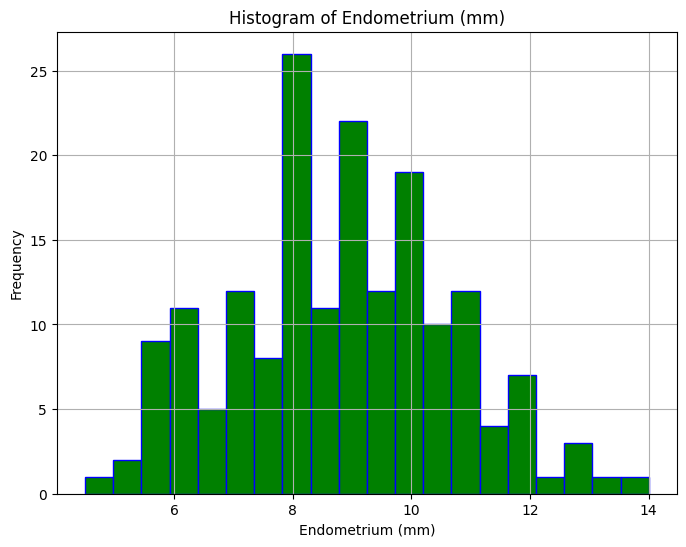

In [ ]:
#2. Distribution analysis for numerical attributes

# List of numerical attributes for distribution analysis
numerical_attributes = [ 'BMI', 'Hb(g/dl)','RR (breaths/min)',
                        'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
                        'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
                        'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
                        'Endometrium (mm)']
df_pcos = pcos_data[pcos_data['PCOS (Y/N)']==1]
# Create histograms for each numerical attribute
for attribute in numerical_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df_pcos[attribute], bins=20, color='green', edgecolor='blue')
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

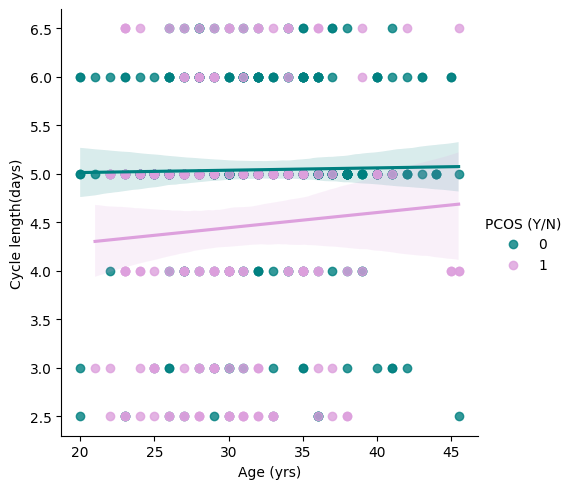

In [ ]:
# Length of menstrual phase in PCOS vs normal (Scatter plot) teal (0.0) - without PCOS & plum (1.0) - with PCOS
color = ["teal", "plum"]
fig=sns.lmplot(data=pcos_data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

**Age vs Cycle Length (PCOS vs Non-PCOS)**

* Women with PCOS tend to have a slightly longer cycle length on average.
* Non-PCOS individuals show a more stable cycle length distribution.
* There are multiple discrete cycle length values, suggesting that cycle irregularities are more frequent among PCOS individuals.

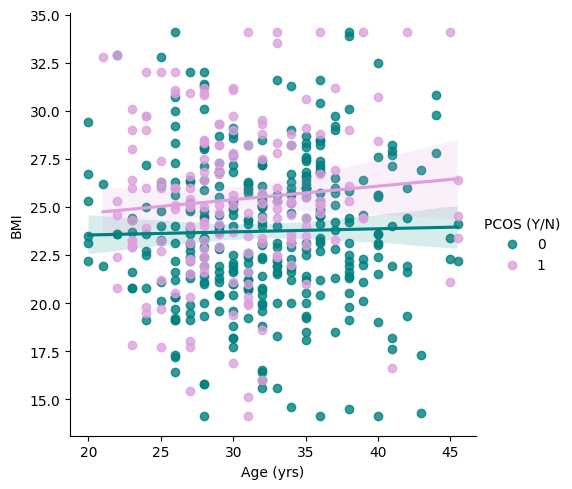

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal.
fig= sns.lmplot(data =pcos_data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

**Age vs BMI (PCOS vs Non-PCOS)**

* There is no strong correlation between age and BMI for either PCOS or non-PCOS groups.
* Individuals with PCOS (pink) tend to have a slightly higher BMI compared to those without PCOS (green).

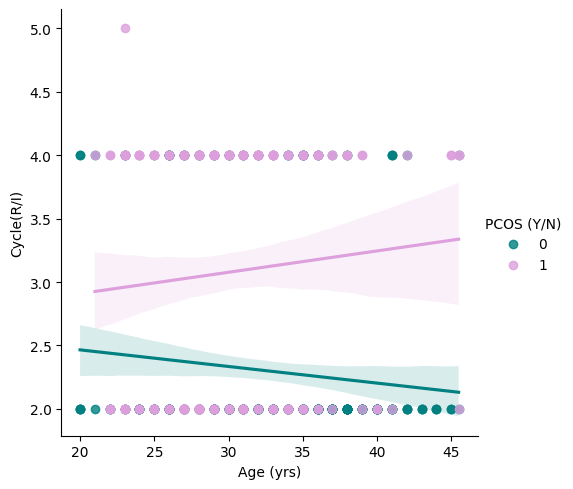

In [ ]:
# cycle IR wrt age
sns.lmplot(data =pcos_data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

**Age vs Cycle Regularity/Irregularity (PCOS vs Non-PCOS)**

* PCOS individuals tend to have higher irregular cycle values.
* Non-PCOS individuals have more consistent regular cycles over time.
* Cycle regularity decreases slightly with age in non-PCOS individuals, while PCOS individuals show an increasing trend in irregularity.

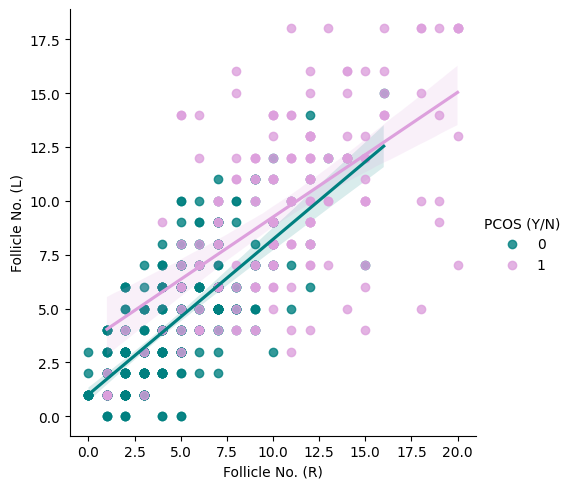

In [ ]:
# Distribution of follicles in both ovaries.
sns.lmplot(data =pcos_data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

**Follicle Count in Left vs Right Ovary (PCOS vs Non-PCOS)**

* There is a strong correlation between follicle count in both ovaries.
* PCOS individuals (pink) tend to have a significantly higher follicle count compared to non-PCOS individuals.

In [ ]:
#Assiging the features (X)and target(y)

X=pcos_data.drop(["PCOS (Y/N)"],axis = 1) #droping out index from features too
y=pcos_data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
age_groups = [0,18,25,35,45,float('inf')]
age_labels = ['<18','18-25','26-35','36-45','45+']
pcos_data['Age Group'] = pd.cut(pcos_data['Age (yrs)'],bins = age_groups,labels = age_labels)

In [ ]:
#1. Feature selection based on correlation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, precision_score

# Selecting relevant features based on correlation
relevant_features = [
    "Follicle No. (R)", "Follicle No. (L)", "Skin darkening (Y/N)",
    "hair growth(Y/N)", "Weight gain(Y/N)", "Cycle(R/I)", "Fast food (Y/N)"
]

# Preparing the dataset with selected features
X = pcos_data[relevant_features]
y = pcos_data["PCOS (Y/N)"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Only if features are numeric)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
X.head()

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N)
0,3.0,3.0,0,0,0,2,1.0
1,5.0,3.0,0,0,0,2,0.0
2,15.0,13.0,0,0,0,2,1.0
3,2.0,2.0,0,0,0,2,0.0
4,4.0,3.0,0,0,0,2,0.0


**MODEL BUILDING**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


In [ ]:
# Metrics for Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)*100
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
roc_auc_log = roc_auc_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)

In [ ]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_log}")
print(f"Confusion Matrix:\n{conf_matrix_log}")
print(f"ROC AUC: {roc_auc_log}")
print(f"F1 Score: {f1_log}")
print(f"Precision: {precision_log}")

# Create a dictionary to store the metrics
model_metrics = {}

# Store metrics for Logistic Regression
model_metrics['Logistic Regression'] = {
    'Accuracy': accuracy_log,
    'Confusion Matrix': conf_matrix_log,
    'ROC AUC': roc_auc_log,
    'F1 Score': f1_log,
    'Precision': precision_log
}

Logistic Regression Metrics:
Accuracy: 86.23853211009175
Confusion Matrix:
[[71  6]
 [ 9 23]]
ROC AUC: 0.820413961038961
F1 Score: 0.7540983606557377
Precision: 0.7931034482758621


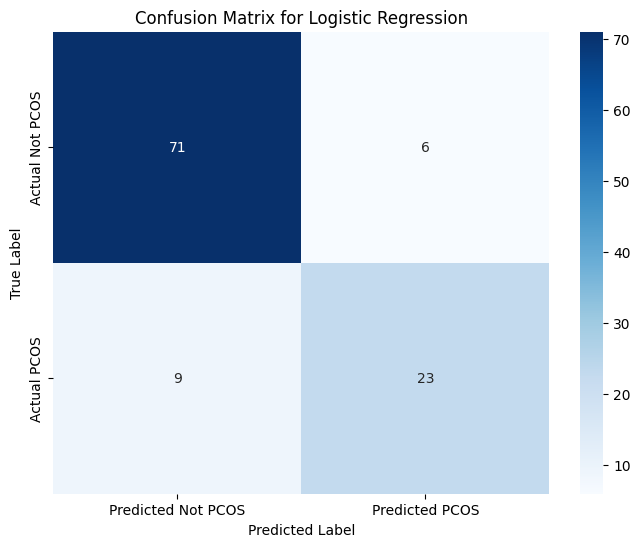

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not PCOS', 'Predicted PCOS'],
            yticklabels=['Actual Not PCOS', 'Actual PCOS'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
# Metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)

In [ ]:
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")
print(f"ROC AUC: {roc_auc_dt}")
print(f"F1 Score: {f1_dt}")
print(f"Precision: {precision_dt}")

# Store metrics for Decision Tree
model_metrics['Decision Tree'] = {
    'Accuracy': accuracy_dt,
    'Confusion Matrix': conf_matrix_dt,
    'ROC AUC': roc_auc_dt,
    'F1 Score': f1_dt,
    'Precision': precision_dt
}

Decision Tree Metrics:
Accuracy: 83.4862385321101
Confusion Matrix:
[[67 10]
 [ 8 24]]
ROC AUC: 0.810064935064935
F1 Score: 0.7272727272727273
Precision: 0.7058823529411765


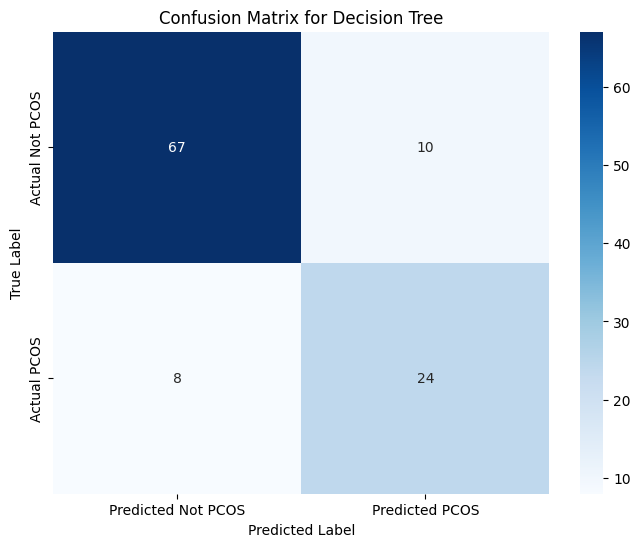

In [ ]:
# Visualize the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not PCOS', 'Predicted PCOS'],
            yticklabels=['Actual Not PCOS', 'Actual PCOS'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

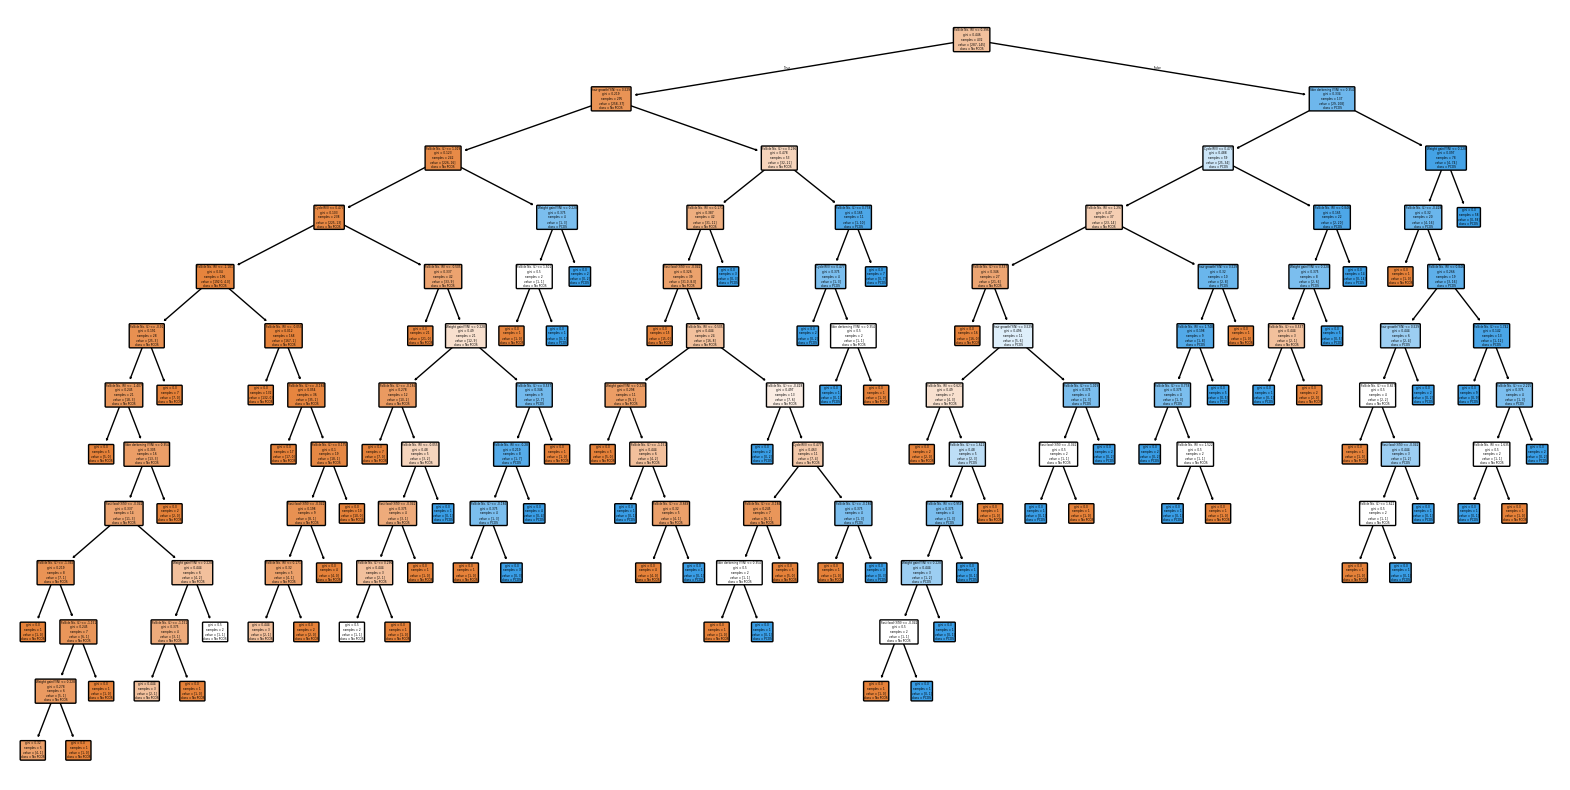

In [ ]:


from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No PCOS', 'PCOS'], rounded=True)
plt.show()


In [ ]:
# Train and evaluate XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)*100
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

In [ ]:
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")
print(f"ROC AUC: {roc_auc_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Precision: {precision_xgb}")


# Store metrics for XGBoost
model_metrics['XGBoost'] = {
    'Accuracy': accuracy_xgb,
    'Confusion Matrix': conf_matrix_xgb,
    'ROC AUC': roc_auc_xgb,
    'F1 Score': f1_xgb,
    'Precision': precision_xgb
}

XGBoost Metrics:
Accuracy: 88.07339449541286
Confusion Matrix:
[[68  9]
 [ 4 28]]
ROC AUC: 0.8790584415584415
F1 Score: 0.8115942028985508
Precision: 0.7567567567567568


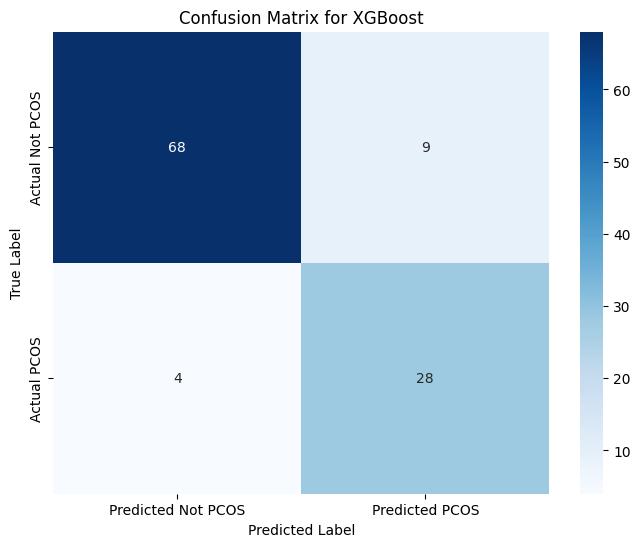

In [ ]:
# Visualize the confusion matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not PCOS', 'Predicted PCOS'],
            yticklabels=['Actual Not PCOS', 'Actual PCOS'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"ROC AUC: {roc_auc_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Precision: {precision_rf}")


# Store metrics for Random Forest
model_metrics['Random Forest'] = {
    'Accuracy': accuracy_rf,
    'Confusion Matrix': conf_matrix_rf,
    'ROC AUC': roc_auc_rf,
    'F1 Score': f1_rf,
    'Precision': precision_rf
}

Random Forest Metrics:
Accuracy: 88.07339449541286
Confusion Matrix:
[[70  7]
 [ 6 26]]
ROC AUC: 0.8607954545454546
F1 Score: 0.8
Precision: 0.7878787878787878


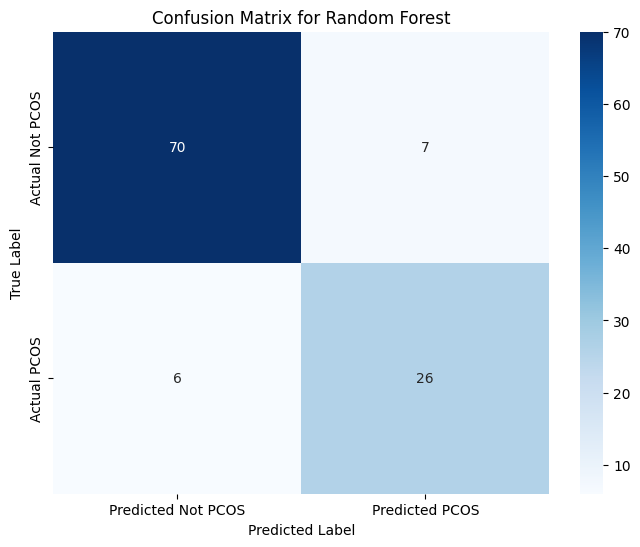

In [ ]:
# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not PCOS', 'Predicted PCOS'],
            yticklabels=['Actual Not PCOS', 'Actual PCOS'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame from the model_metrics dictionary
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')


# Display the table with formatting
print(metrics_df.to_string())

                      Accuracy     Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  86.238532   [[71, 6], [9, 23]]  0.820414  0.754098   0.793103
Decision Tree        83.486239  [[67, 10], [8, 24]]  0.810065  0.727273   0.705882
XGBoost              88.073394   [[68, 9], [4, 28]]  0.879058  0.811594   0.756757
Random Forest        88.073394   [[70, 7], [6, 26]]  0.860795  0.800000   0.787879


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_score)  # Calculate ROC curve values
    roc_auc = auc(fpr, tpr)  # Calculate AUC

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

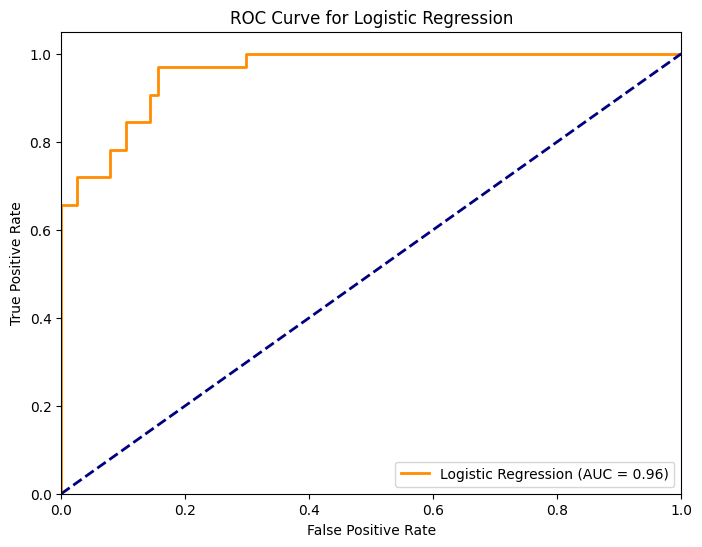

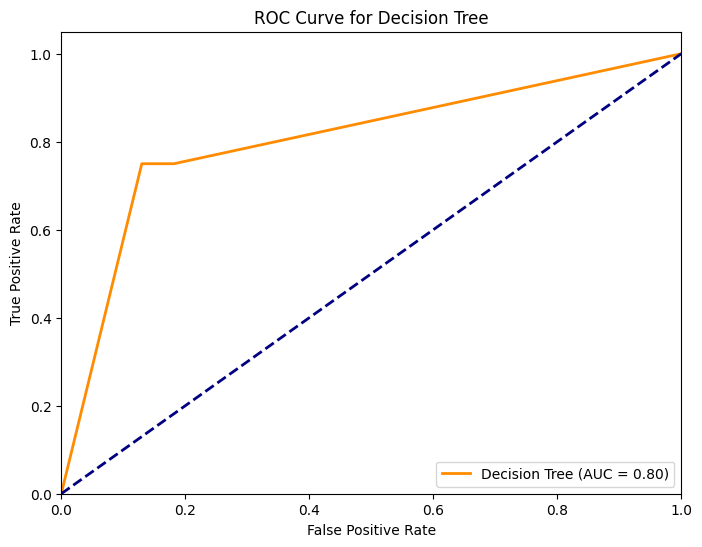

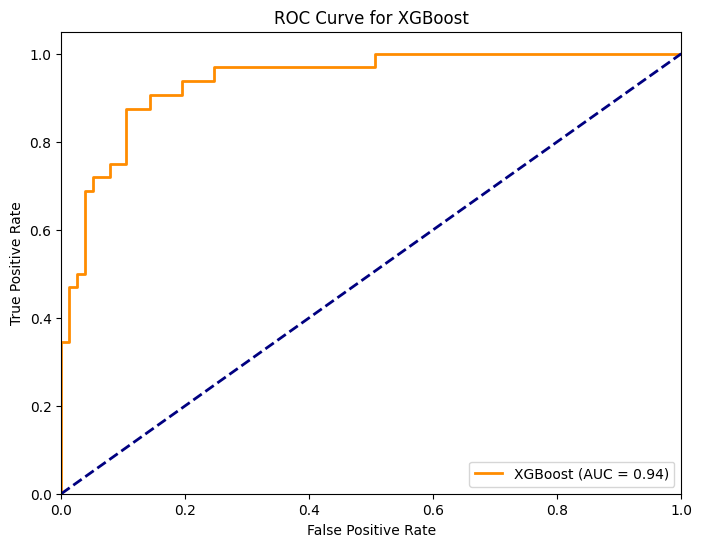

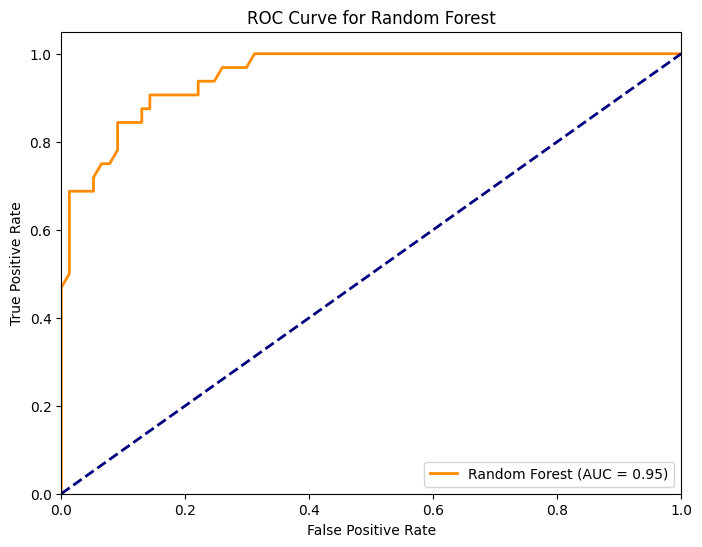

In [ ]:
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression')
plot_roc_curve(dt, X_test, y_test, 'Decision Tree')
plot_roc_curve(xgb, X_test, y_test, 'XGBoost')
plot_roc_curve(rf, X_test, y_test, 'Random Forest')

In [ ]:
# Categorize the 'Age (yrs)' column into age groups
age_group_counts = pcos_data.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()
type(age_group_counts)

<ipython-input-57-9ff3bbbf7231>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = pcos_data.groupby(['Age Group', 'PCOS (Y/N)']).size().unstack()


pandas.core.frame.DataFrame

In [ ]:
def predict_with_all_models(instance):
  predictions = {}

  # Create a DataFrame with all columns, filling missing values with 0
  instance_df = pd.DataFrame([instance], columns=X.columns)

  # Scale the instance using the same scaler used for the training data
  scaled_instance = scaler.transform(instance_df)

  predictions['Logistic Regression'] = log_reg.predict(scaled_instance)[0]
  predictions['Decision Tree'] = dt.predict(scaled_instance)[0]
  predictions['XGBoost'] = xgb.predict(scaled_instance)[0]
  predictions['Random Forest'] = rf.predict(scaled_instance)[0]

  return predictions


# Example usage with a sample data instance
new_data_instance = pd.Series([10, 16, 1, 1, 1, 4, 1], index=X.columns)  # Provide values for all columns in X

results = predict_with_all_models(new_data_instance)
print(results)


{'Logistic Regression': np.int64(1), 'Decision Tree': np.int64(1), 'XGBoost': np.int64(1), 'Random Forest': np.int64(1)}


In [ ]:
# Filter data based on 'Weight gain(Y/N)'
weight_gain_yes = pcos_data[pcos_data['Weight gain(Y/N)'] == 1]
weight_gain_no = pcos_data[pcos_data['Weight gain(Y/N)'] == 0]

# Define target variable
y_yes = weight_gain_yes['PCOS (Y/N)']
X_yes = weight_gain_yes.drop(columns=['PCOS (Y/N)', 'Weight gain(Y/N)', 'Age Group']) # Drop 'Age Group' column
y_no = weight_gain_no['PCOS (Y/N)']
X_no = weight_gain_no.drop(columns=['PCOS (Y/N)', 'Weight gain(Y/N)', 'Age Group']) # Drop 'Age Group' column


# Standardize numerical features
scaler = StandardScaler()
X_yes = pd.DataFrame(scaler.fit_transform(X_yes), columns=X_yes.columns)
X_no = pd.DataFrame(scaler.fit_transform(X_no), columns=X_no.columns)

# Train-test split
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size=0.2, stratify=y_yes, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, stratify=y_no, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_auc, f1, precision

# Store results
model_metrics_yes = {}
model_metrics_no = {}

for name, model in models.items():
    #print(f"Evaluating {name} for Weight Gain = Yes")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_yes, X_test_yes, y_train_yes, y_test_yes)
    model_metrics_yes[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

    #print(f"Evaluating {name} for Weight Gain = No")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_no, X_test_no, y_train_no, y_test_no)
    model_metrics_no[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

# Display results
print("Results for Weight Gain = Yes")
print(pd.DataFrame.from_dict(model_metrics_yes, orient='index').to_string())

print("\nResults for Weight Gain = No")
print(pd.DataFrame.from_dict(model_metrics_no, orient='index').to_string())

Results for Weight Gain = Yes
                      Accuracy    Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  92.682927  [[15, 2], [1, 23]]  0.920343  0.938776   0.920000
Decision Tree        78.048780  [[13, 4], [5, 19]]  0.778186  0.808511   0.826087
XGBoost              92.682927  [[17, 0], [3, 21]]  0.937500  0.933333   1.000000
Random Forest        85.365854  [[15, 2], [4, 20]]  0.857843  0.869565   0.909091

Results for Weight Gain = No
                      Accuracy   Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  85.294118  [[50, 7], [3, 8]]  0.802233  0.615385   0.533333
Decision Tree        80.882353  [[49, 8], [5, 6]]  0.702552  0.480000   0.428571
XGBoost              89.705882  [[54, 3], [4, 7]]  0.791866  0.666667   0.700000
Random Forest        86.764706  [[55, 2], [7, 4]]  0.664274  0.470588   0.666667


* For individuals with Weight Gain (Y/N = Yes), XGBoost is the best choice due to its high accuracy, AUC, and F1 score.

* For individuals with Weight Gain (Y/N = No), XGBoost remains the most reliable choice, though further improvements using techniques like class balancing or feature engineering may enhance performance.

In [ ]:
# Filter data based on 'Skin darkening (Y/N)'
weight_gain_yes = pcos_data[pcos_data['Skin darkening (Y/N)'] == 1]
weight_gain_no = pcos_data[pcos_data['Skin darkening (Y/N)'] == 0]

# Define target variable
y_yes = weight_gain_yes['PCOS (Y/N)']
X_yes = weight_gain_yes.drop(columns=['PCOS (Y/N)', 'Skin darkening (Y/N)', 'Age Group']) # Drop 'Age Group' column
y_no = weight_gain_no['PCOS (Y/N)']
X_no = weight_gain_no.drop(columns=['PCOS (Y/N)', 'Skin darkening (Y/N)', 'Age Group']) # Drop 'Age Group' column


# Standardize numerical features
scaler = StandardScaler()
X_yes = pd.DataFrame(scaler.fit_transform(X_yes), columns=X_yes.columns)
X_no = pd.DataFrame(scaler.fit_transform(X_no), columns=X_no.columns)

# Train-test split
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size=0.2, stratify=y_yes, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, stratify=y_no, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_auc, f1, precision

# Store results
model_metrics_yes = {}
model_metrics_no = {}

for name, model in models.items():
    #print(f"Evaluating {name} for Weight Gain = Yes")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_yes, X_test_yes, y_train_yes, y_test_yes)
    model_metrics_yes[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

    #print(f"Evaluating {name} for Weight Gain = No")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_no, X_test_no, y_train_no, y_test_no)
    model_metrics_no[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

# Display results
print("Results for Skin darkening = Yes")
print(pd.DataFrame.from_dict(model_metrics_yes, orient='index').to_string())

print("\nResults for Skin darkening = No")
print(pd.DataFrame.from_dict(model_metrics_no, orient='index').to_string())

Results for Skin darkening = Yes
                      Accuracy    Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  88.235294   [[9, 2], [2, 21]]  0.865613  0.913043   0.913043
Decision Tree        82.352941   [[9, 2], [4, 19]]  0.822134  0.863636   0.904762
XGBoost              94.117647  [[10, 1], [1, 22]]  0.932806  0.956522   0.956522
Random Forest        85.294118   [[6, 5], [0, 23]]  0.772727  0.901961   0.821429

Results for Skin darkening = No
                      Accuracy   Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  88.000000  [[57, 5], [4, 9]]  0.805831  0.666667   0.642857
Decision Tree        82.666667  [[54, 8], [5, 8]]  0.743176  0.551724   0.500000
XGBoost              88.000000  [[60, 2], [7, 6]]  0.714640  0.571429   0.750000
Random Forest        90.666667  [[61, 1], [6, 7]]  0.761166  0.666667   0.875000


* Skin Darkening (Y/N) is a significant feature influencing model performance.

* XGBoost is generally the best for Skin Darkening = Yes, while Random Forest performs better when Skin Darkening = No.

In [ ]:
# Define bins and labels
bins = [0, 5, 10, 15, 20]
labels = ['Low', 'Medium', 'High', 'Very High']
pcos_data['Follicle_R_Range'] = pd.cut(pcos_data['Follicle No. (R)'], bins=bins, labels=labels, include_lowest=True)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_auc, f1, precision

# Store results
results = []

for label in labels:
    bin_data = pcos_data[pcos_data['Follicle_R_Range'] == label]
    if len(bin_data) < 10:  # Skip if insufficient data
        continue

    # Separate features and target
    y = bin_data['PCOS (Y/N)']
    X = bin_data.drop(columns=['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle_R_Range', 'Age Group']) # Drop 'Age Group'

    # Standardization
    # Select only numerical features for scaling
    numerical_features = X.select_dtypes(include=['number']).columns
    scaler = StandardScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])

    # Train-test split
    # Check if stratify is possible
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    except ValueError:
        # If stratify fails due to insufficient class representation,
        # perform a simple split without stratification
        print(f"Stratification not possible for bin: {label}. Performing a simple split.")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    for name, model in models.items():
        acc, cm, roc, f1, prec = evaluate_model(model, X_train, X_test, y_train, y_test)
        results.append([label, name, acc, roc, f1, prec])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Bin', 'Model', 'Accuracy', 'ROC AUC', 'F1 Score', 'Precision'])
print(results_df.to_string())

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Stratification not possible for bin: Very High. Performing a simple split.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: Undefin

          Bin                Model    Accuracy   ROC AUC  F1 Score  Precision
0         Low  Logistic Regression   88.461538  0.479167  0.000000   0.000000
1         Low        Decision Tree   84.615385  0.458333  0.000000   0.000000
2         Low              XGBoost   92.307692  0.500000  0.000000   0.000000
3         Low        Random Forest   92.307692  0.500000  0.000000   0.000000
4      Medium  Logistic Regression   83.783784  0.841615  0.800000   0.750000
5      Medium        Decision Tree   64.864865  0.661491  0.606061   0.526316
6      Medium              XGBoost   81.081081  0.819876  0.774194   0.705882
7      Medium        Random Forest   81.081081  0.791925  0.740741   0.769231
8        High  Logistic Regression   87.500000  0.928571  0.923077   1.000000
9        High        Decision Tree   81.250000  0.678571  0.888889   0.923077
10       High              XGBoost   87.500000  0.500000  0.933333   0.875000
11       High        Random Forest   87.500000  0.500000  0.9333

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [ ]:
# Filter data based on 'hair growth(Y/N)'
weight_gain_yes = pcos_data[pcos_data['hair growth(Y/N)'] == 1]
weight_gain_no = pcos_data[pcos_data['hair growth(Y/N)'] == 0]

# Define target variable
y_yes = weight_gain_yes['PCOS (Y/N)']
X_yes = weight_gain_yes.drop(columns=['PCOS (Y/N)', 'hair growth(Y/N)', 'Age Group']) # Drop 'Age Group' column
y_no = weight_gain_no['PCOS (Y/N)']
X_no = weight_gain_no.drop(columns=['PCOS (Y/N)', 'hair growth(Y/N)', 'Age Group']) # Drop 'Age Group' column

# One-hot encoding for categorical features
X_yes = pd.get_dummies(X_yes, drop_first=True)  # Convert categorical features to numerical using one-hot encoding
X_no = pd.get_dummies(X_no, drop_first=True)   # Convert categorical features to numerical using one-hot encoding


# Standardize numerical features
scaler = StandardScaler()
X_yes = pd.DataFrame(scaler.fit_transform(X_yes), columns=X_yes.columns)
X_no = pd.DataFrame(scaler.fit_transform(X_no), columns=X_no.columns)

# Train-test split
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size=0.2, stratify=y_yes, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, stratify=y_no, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_auc, f1, precision

# Store results
model_metrics_yes = {}
model_metrics_no = {}

for name, model in models.items():
    #print(f"Evaluating {name} for Weight Gain = Yes")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_yes, X_test_yes, y_train_yes, y_test_yes)
    model_metrics_yes[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

    #print(f"Evaluating {name} for Weight Gain = No")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_no, X_test_no, y_train_no, y_test_no)
    model_metrics_no[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

# Display results
print("Results for hair growth = Yes")
print(pd.DataFrame.from_dict(model_metrics_yes, orient='index').to_string())

print("\nResults for hair growth = No")
print(pd.DataFrame.from_dict(model_metrics_no, orient='index').to_string())

Results for hair growth = Yes
                      Accuracy   Confusion Matrix  ROC AUC  F1 Score  Precision
Logistic Regression  80.000000  [[7, 3], [3, 17]]    0.775  0.850000   0.850000
Decision Tree        73.333333  [[7, 3], [5, 15]]    0.725  0.789474   0.833333
XGBoost              86.666667  [[8, 2], [2, 18]]    0.850  0.900000   0.900000
Random Forest        90.000000  [[9, 1], [2, 18]]    0.900  0.923077   0.947368

Results for hair growth = No
                      Accuracy    Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  87.341772   [[60, 4], [6, 9]]  0.768750  0.642857   0.692308
Decision Tree        84.810127  [[55, 9], [3, 12]]  0.829688  0.666667   0.571429
XGBoost              89.873418  [[61, 3], [5, 10]]  0.809896  0.714286   0.769231
Random Forest        89.873418  [[61, 3], [5, 10]]  0.809896  0.714286   0.769231


In [ ]:
# Filter data based on 'Cycle(R/I)'
weight_gain_yes = pcos_data[pcos_data['Cycle(R/I)'] == 2]
weight_gain_no = pcos_data[pcos_data['Cycle(R/I)'] == 4]

# Define target variable
y_yes = weight_gain_yes['PCOS (Y/N)']
X_yes = weight_gain_yes.drop(columns=['PCOS (Y/N)', 'Cycle(R/I)', 'Age Group']) # Drop 'Age Group' column
y_no = weight_gain_no['PCOS (Y/N)']
X_no = weight_gain_no.drop(columns=['PCOS (Y/N)', 'Cycle(R/I)', 'Age Group']) # Drop 'Age Group' column

# One-hot encoding for categorical features
X_yes = pd.get_dummies(X_yes, drop_first=True)  # Convert categorical features to numerical using one-hot encoding
X_no = pd.get_dummies(X_no, drop_first=True)   # Convert categorical features to numerical using one-hot encoding


# Standardize numerical features
scaler = StandardScaler()
X_yes = pd.DataFrame(scaler.fit_transform(X_yes), columns=X_yes.columns)
X_no = pd.DataFrame(scaler.fit_transform(X_no), columns=X_no.columns)

# Train-test split
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size=0.2, stratify=y_yes, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, stratify=y_no, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_auc, f1, precision

# Store results
model_metrics_yes = {}
model_metrics_no = {}

for name, model in models.items():
    #print(f"Evaluating {name} for Weight Gain = Yes")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_yes, X_test_yes, y_train_yes, y_test_yes)
    model_metrics_yes[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

    #print(f"Evaluating {name} for Weight Gain = No")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_no, X_test_no, y_train_no, y_test_no)
    model_metrics_no[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

# Display results
print("Results for Cycle(R/I) = Yes")
print(pd.DataFrame.from_dict(model_metrics_yes, orient='index').to_string())

print("\nResults for Cycle(R/I) = No")
print(pd.DataFrame.from_dict(model_metrics_no, orient='index').to_string())

Results for Cycle(R/I) = Yes
                      Accuracy    Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  91.025641  [[59, 3], [4, 12]]  0.850806  0.774194   0.800000
Decision Tree        85.897436  [[56, 6], [5, 11]]  0.795363  0.666667   0.647059
XGBoost              93.589744  [[59, 3], [2, 14]]  0.913306  0.848485   0.823529
Random Forest        92.307692  [[60, 2], [4, 12]]  0.858871  0.800000   0.857143

Results for Cycle(R/I) = No
                      Accuracy   Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  66.666667  [[6, 5], [5, 14]]  0.641148  0.736842   0.736842
Decision Tree        76.666667  [[9, 2], [5, 14]]  0.777512  0.800000   0.875000
XGBoost              83.333333  [[9, 2], [3, 16]]  0.830144  0.864865   0.888889
Random Forest        80.000000  [[9, 2], [4, 15]]  0.803828  0.833333   0.882353


In [ ]:
# Filter data based on 'Fast food (Y/N)'
weight_gain_yes = pcos_data[pcos_data['Fast food (Y/N)'] == 1]
weight_gain_no = pcos_data[pcos_data['Fast food (Y/N)'] == 0]

# Define target variable
y_yes = weight_gain_yes['PCOS (Y/N)']
X_yes = weight_gain_yes.drop(columns=['PCOS (Y/N)', 'Fast food (Y/N)', 'Age Group']) # Drop 'Age Group' column
y_no = weight_gain_no['PCOS (Y/N)']
X_no = weight_gain_no.drop(columns=['PCOS (Y/N)', 'Fast food (Y/N)', 'Age Group']) # Drop 'Age Group' column

# One-hot encoding for categorical features
X_yes = pd.get_dummies(X_yes, drop_first=True)  # Convert categorical features to numerical using one-hot encoding
X_no = pd.get_dummies(X_no, drop_first=True)   # Convert categorical features to numerical using one-hot encoding


# Standardize numerical features
scaler = StandardScaler()
X_yes = pd.DataFrame(scaler.fit_transform(X_yes), columns=X_yes.columns)
X_no = pd.DataFrame(scaler.fit_transform(X_no), columns=X_no.columns)

# Train-test split
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size=0.2, stratify=y_yes, random_state=42)
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.2, stratify=y_no, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_auc, f1, precision

# Store results
model_metrics_yes = {}
model_metrics_no = {}

for name, model in models.items():
    #print(f"Evaluating {name} for Weight Gain = Yes")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_yes, X_test_yes, y_train_yes, y_test_yes)
    model_metrics_yes[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

    #print(f"Evaluating {name} for Weight Gain = No")
    acc, cm, roc, f1, prec = evaluate_model(model, X_train_no, X_test_no, y_train_no, y_test_no)
    model_metrics_no[name] = {'Accuracy': acc, 'Confusion Matrix': cm, 'ROC AUC': roc, 'F1 Score': f1, 'Precision': prec}

# Display results
print("Results for Fast food  = Yes")
print(pd.DataFrame.from_dict(model_metrics_yes, orient='index').to_string())

print("\nResults for Fast food  = No")
print(pd.DataFrame.from_dict(model_metrics_no, orient='index').to_string())

Results for Fast food  = Yes
                      Accuracy    Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  80.357143  [[25, 3], [8, 20]]  0.803571  0.784314   0.869565
Decision Tree        85.714286  [[26, 2], [6, 22]]  0.857143  0.846154   0.916667
XGBoost              83.928571  [[26, 2], [7, 21]]  0.839286  0.823529   0.913043
Random Forest        82.142857  [[25, 3], [7, 21]]  0.821429  0.807692   0.875000

Results for Fast food  = No
                      Accuracy   Confusion Matrix   ROC AUC  F1 Score  Precision
Logistic Regression  88.679245  [[41, 4], [2, 6]]  0.830556  0.666667   0.600000
Decision Tree        90.566038  [[42, 3], [2, 6]]  0.841667  0.705882   0.666667
XGBoost              90.566038  [[44, 1], [4, 4]]  0.738889  0.615385   0.800000
Random Forest        92.452830  [[45, 0], [4, 4]]  0.750000  0.666667   1.000000
